# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

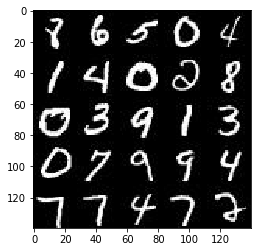

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

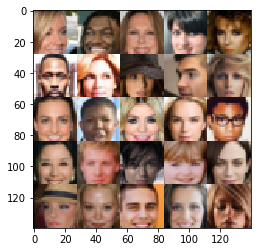

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/shahzadsalim/anaconda3/envs/dog-project/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.1
    init = tf.random_normal_initializer(stddev=0.02)


    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=init, padding="same")
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.9)


        #print("discriminator 1")

        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, kernel_initializer=init, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.9)

        
        #print("discriminator 2")
       

        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, kernel_initializer=init, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.9)


        #print("discriminator 3")

        x = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

        #print("discriminator 4")

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.1
    init = tf.random_normal_initializer(stddev=0.02)

    with tf.variable_scope('generator', reuse=not is_train):
        #print("generator 1")

        x = tf.layers.dense(z, 7*7*512)
        
        x = tf.reshape(x, (-1,7, 7, 512))
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        

        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, kernel_initializer=init, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        #print("generator 2")

        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, kernel_initializer=init, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        #print("generator 3")

        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, kernel_initializer=init, padding="same")
        #print("generator 4")

       
        out = tf.tanh(logits)
        
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #print("modeloss_1")

    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    #print("modeloss_2")

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    #print("modeloss_3")

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    #print("modeloss_4")

    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    #print("modeloss_5")

    
    
    return d_loss, g_loss
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #print("modelot_1")
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]
    #print("modelot_2")

    
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
        #print("modelot_3")

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
        #print("modelot_4")

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count, image_width, image_height, image_channels = data_shape

    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                #print("here 2")

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 2.0727
Epoch 1/2... Discriminator Loss: 0.5692... Generator Loss: 2.8767
Epoch 1/2... Discriminator Loss: 0.6324... Generator Loss: 2.4939
Epoch 1/2... Discriminator Loss: 0.9786... Generator Loss: 3.9809
Epoch 1/2... Discriminator Loss: 0.7979... Generator Loss: 2.1735
Epoch 1/2... Discriminator Loss: 0.7004... Generator Loss: 3.3121
Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 2.5255
Epoch 1/2... Discriminator Loss: 0.7722... Generator Loss: 1.6366
Epoch 1/2... Discriminator Loss: 0.7541... Generator Loss: 2.0845
Epoch 1/2... Discriminator Loss: 0.7532... Generator Loss: 1.9747


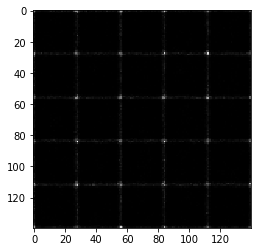

Epoch 1/2... Discriminator Loss: 0.8688... Generator Loss: 4.1241
Epoch 1/2... Discriminator Loss: 0.4949... Generator Loss: 2.6823
Epoch 1/2... Discriminator Loss: 0.5432... Generator Loss: 3.2073
Epoch 1/2... Discriminator Loss: 0.4754... Generator Loss: 2.4715
Epoch 1/2... Discriminator Loss: 0.4884... Generator Loss: 2.3412
Epoch 1/2... Discriminator Loss: 0.6771... Generator Loss: 2.8645
Epoch 1/2... Discriminator Loss: 2.2754... Generator Loss: 0.3131
Epoch 1/2... Discriminator Loss: 0.6265... Generator Loss: 3.1721
Epoch 1/2... Discriminator Loss: 0.7057... Generator Loss: 2.0376
Epoch 1/2... Discriminator Loss: 0.5811... Generator Loss: 2.6825


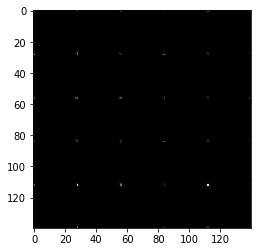

Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 2.7536
Epoch 1/2... Discriminator Loss: 1.1986... Generator Loss: 1.2716
Epoch 1/2... Discriminator Loss: 1.0735... Generator Loss: 1.7004
Epoch 1/2... Discriminator Loss: 0.7387... Generator Loss: 1.5495
Epoch 1/2... Discriminator Loss: 0.7575... Generator Loss: 2.1761
Epoch 1/2... Discriminator Loss: 1.5752... Generator Loss: 4.3533
Epoch 1/2... Discriminator Loss: 0.6337... Generator Loss: 2.7665
Epoch 1/2... Discriminator Loss: 0.6208... Generator Loss: 1.9563
Epoch 1/2... Discriminator Loss: 0.7968... Generator Loss: 3.7060
Epoch 1/2... Discriminator Loss: 0.8689... Generator Loss: 1.1331


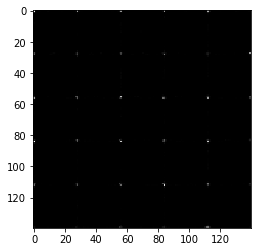

Epoch 1/2... Discriminator Loss: 0.4968... Generator Loss: 2.5203
Epoch 1/2... Discriminator Loss: 1.0575... Generator Loss: 4.1242
Epoch 1/2... Discriminator Loss: 0.5613... Generator Loss: 1.8650
Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 1.4904
Epoch 1/2... Discriminator Loss: 0.9372... Generator Loss: 1.7574
Epoch 1/2... Discriminator Loss: 0.9286... Generator Loss: 0.7979
Epoch 1/2... Discriminator Loss: 1.1151... Generator Loss: 4.2909
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 4.6397
Epoch 1/2... Discriminator Loss: 0.8049... Generator Loss: 1.4236
Epoch 1/2... Discriminator Loss: 0.8403... Generator Loss: 1.3501


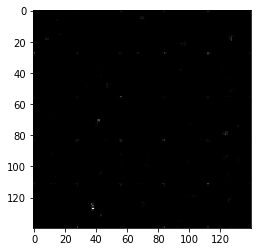

Epoch 1/2... Discriminator Loss: 0.5546... Generator Loss: 2.4972
Epoch 1/2... Discriminator Loss: 0.5743... Generator Loss: 2.4460
Epoch 1/2... Discriminator Loss: 0.5467... Generator Loss: 2.0512
Epoch 1/2... Discriminator Loss: 0.5283... Generator Loss: 2.6141
Epoch 1/2... Discriminator Loss: 0.6596... Generator Loss: 2.5733
Epoch 1/2... Discriminator Loss: 1.0563... Generator Loss: 4.5737
Epoch 1/2... Discriminator Loss: 0.6417... Generator Loss: 3.1918
Epoch 1/2... Discriminator Loss: 0.5165... Generator Loss: 2.7568
Epoch 1/2... Discriminator Loss: 0.4730... Generator Loss: 2.4912
Epoch 1/2... Discriminator Loss: 0.6742... Generator Loss: 2.4507


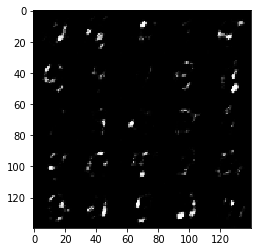

Epoch 1/2... Discriminator Loss: 0.9823... Generator Loss: 0.9579
Epoch 1/2... Discriminator Loss: 0.9158... Generator Loss: 1.3744
Epoch 1/2... Discriminator Loss: 0.9407... Generator Loss: 4.1609
Epoch 1/2... Discriminator Loss: 0.6445... Generator Loss: 3.0375
Epoch 1/2... Discriminator Loss: 0.6352... Generator Loss: 3.6730
Epoch 1/2... Discriminator Loss: 1.3106... Generator Loss: 0.6147
Epoch 1/2... Discriminator Loss: 0.5652... Generator Loss: 2.0408
Epoch 1/2... Discriminator Loss: 0.6395... Generator Loss: 3.7914
Epoch 1/2... Discriminator Loss: 1.1520... Generator Loss: 1.0176
Epoch 1/2... Discriminator Loss: 0.6509... Generator Loss: 1.9784


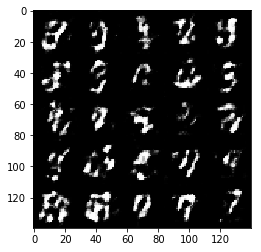

Epoch 1/2... Discriminator Loss: 1.2194... Generator Loss: 5.0620
Epoch 1/2... Discriminator Loss: 0.4944... Generator Loss: 2.3814
Epoch 1/2... Discriminator Loss: 0.5885... Generator Loss: 2.1277
Epoch 1/2... Discriminator Loss: 0.6027... Generator Loss: 2.8965
Epoch 1/2... Discriminator Loss: 0.5661... Generator Loss: 2.3223
Epoch 1/2... Discriminator Loss: 0.6492... Generator Loss: 1.5485
Epoch 1/2... Discriminator Loss: 0.4254... Generator Loss: 2.4793
Epoch 1/2... Discriminator Loss: 0.9556... Generator Loss: 0.8438
Epoch 1/2... Discriminator Loss: 0.7291... Generator Loss: 1.6312
Epoch 1/2... Discriminator Loss: 0.9027... Generator Loss: 3.6259


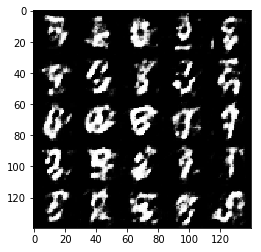

Epoch 1/2... Discriminator Loss: 0.5186... Generator Loss: 1.9998
Epoch 1/2... Discriminator Loss: 1.4668... Generator Loss: 4.7781
Epoch 1/2... Discriminator Loss: 0.4878... Generator Loss: 2.7089
Epoch 1/2... Discriminator Loss: 0.5914... Generator Loss: 2.1348
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 0.5982... Generator Loss: 3.0565
Epoch 1/2... Discriminator Loss: 0.6587... Generator Loss: 2.2972
Epoch 1/2... Discriminator Loss: 1.0733... Generator Loss: 4.7123
Epoch 1/2... Discriminator Loss: 0.5817... Generator Loss: 2.2357
Epoch 1/2... Discriminator Loss: 0.5686... Generator Loss: 2.7600


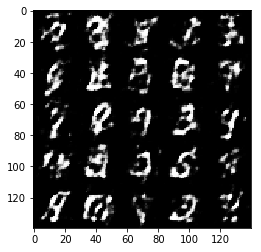

Epoch 1/2... Discriminator Loss: 0.7396... Generator Loss: 2.1183
Epoch 1/2... Discriminator Loss: 0.8151... Generator Loss: 1.9616
Epoch 1/2... Discriminator Loss: 0.5944... Generator Loss: 2.4906
Epoch 1/2... Discriminator Loss: 0.5306... Generator Loss: 3.3516
Epoch 1/2... Discriminator Loss: 0.7521... Generator Loss: 2.2572
Epoch 1/2... Discriminator Loss: 0.5564... Generator Loss: 2.5781
Epoch 1/2... Discriminator Loss: 1.0571... Generator Loss: 1.1679
Epoch 1/2... Discriminator Loss: 0.6797... Generator Loss: 1.8170
Epoch 1/2... Discriminator Loss: 1.4413... Generator Loss: 3.7521
Epoch 1/2... Discriminator Loss: 0.6177... Generator Loss: 2.3023


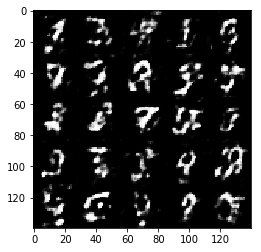

Epoch 1/2... Discriminator Loss: 0.7471... Generator Loss: 2.7759
Epoch 1/2... Discriminator Loss: 0.7588... Generator Loss: 1.6832
Epoch 1/2... Discriminator Loss: 0.5205... Generator Loss: 2.4248
Epoch 1/2... Discriminator Loss: 0.5336... Generator Loss: 3.0909
Epoch 1/2... Discriminator Loss: 0.8484... Generator Loss: 3.3039
Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 1.2288
Epoch 1/2... Discriminator Loss: 0.4610... Generator Loss: 2.6354
Epoch 1/2... Discriminator Loss: 0.5135... Generator Loss: 2.2788
Epoch 1/2... Discriminator Loss: 0.6851... Generator Loss: 3.0251
Epoch 1/2... Discriminator Loss: 0.8593... Generator Loss: 1.0795


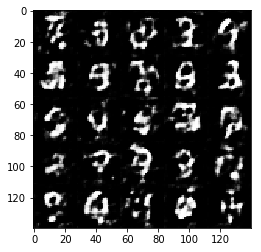

Epoch 1/2... Discriminator Loss: 0.6215... Generator Loss: 2.4706
Epoch 1/2... Discriminator Loss: 0.6720... Generator Loss: 1.4602
Epoch 1/2... Discriminator Loss: 0.5463... Generator Loss: 2.6978
Epoch 1/2... Discriminator Loss: 0.4872... Generator Loss: 2.9016
Epoch 1/2... Discriminator Loss: 0.7266... Generator Loss: 2.2483
Epoch 1/2... Discriminator Loss: 0.4925... Generator Loss: 2.1690
Epoch 1/2... Discriminator Loss: 0.4529... Generator Loss: 3.4643
Epoch 1/2... Discriminator Loss: 0.5887... Generator Loss: 2.2077
Epoch 1/2... Discriminator Loss: 0.5591... Generator Loss: 3.6413
Epoch 1/2... Discriminator Loss: 0.5265... Generator Loss: 2.9474


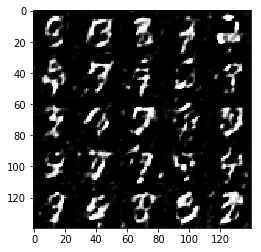

Epoch 1/2... Discriminator Loss: 0.3992... Generator Loss: 2.8086
Epoch 1/2... Discriminator Loss: 0.5688... Generator Loss: 2.9483
Epoch 1/2... Discriminator Loss: 0.5878... Generator Loss: 2.9876
Epoch 1/2... Discriminator Loss: 0.5003... Generator Loss: 2.9729
Epoch 1/2... Discriminator Loss: 0.5004... Generator Loss: 3.9400
Epoch 1/2... Discriminator Loss: 0.8356... Generator Loss: 1.5741
Epoch 1/2... Discriminator Loss: 0.6510... Generator Loss: 1.8871
Epoch 1/2... Discriminator Loss: 0.5294... Generator Loss: 1.6670
Epoch 1/2... Discriminator Loss: 0.6134... Generator Loss: 1.8591
Epoch 1/2... Discriminator Loss: 0.4680... Generator Loss: 2.6204


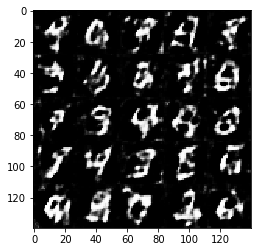

Epoch 1/2... Discriminator Loss: 0.5262... Generator Loss: 1.8918
Epoch 1/2... Discriminator Loss: 0.7131... Generator Loss: 1.5377
Epoch 1/2... Discriminator Loss: 0.5492... Generator Loss: 2.7092
Epoch 1/2... Discriminator Loss: 0.5398... Generator Loss: 2.5004
Epoch 1/2... Discriminator Loss: 0.4908... Generator Loss: 2.5124
Epoch 1/2... Discriminator Loss: 1.1213... Generator Loss: 1.1216
Epoch 1/2... Discriminator Loss: 0.5116... Generator Loss: 2.3994
Epoch 1/2... Discriminator Loss: 0.7459... Generator Loss: 1.4322
Epoch 1/2... Discriminator Loss: 0.4564... Generator Loss: 2.7678
Epoch 1/2... Discriminator Loss: 0.5353... Generator Loss: 2.8760


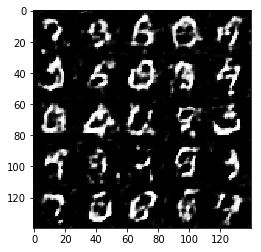

Epoch 1/2... Discriminator Loss: 0.4875... Generator Loss: 3.3846
Epoch 1/2... Discriminator Loss: 0.8379... Generator Loss: 1.7125
Epoch 1/2... Discriminator Loss: 0.4936... Generator Loss: 2.5121
Epoch 1/2... Discriminator Loss: 0.5831... Generator Loss: 3.5037
Epoch 1/2... Discriminator Loss: 0.6181... Generator Loss: 2.7185
Epoch 1/2... Discriminator Loss: 0.6263... Generator Loss: 1.8645
Epoch 1/2... Discriminator Loss: 0.5356... Generator Loss: 2.9307
Epoch 1/2... Discriminator Loss: 0.4576... Generator Loss: 3.1835
Epoch 1/2... Discriminator Loss: 0.4536... Generator Loss: 3.3720
Epoch 1/2... Discriminator Loss: 0.5788... Generator Loss: 2.6556


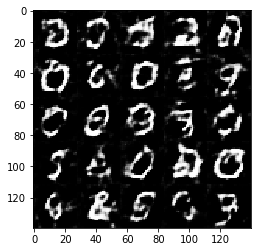

Epoch 1/2... Discriminator Loss: 0.6698... Generator Loss: 1.3331
Epoch 1/2... Discriminator Loss: 0.5142... Generator Loss: 3.3157
Epoch 1/2... Discriminator Loss: 0.4751... Generator Loss: 2.7734
Epoch 1/2... Discriminator Loss: 0.5983... Generator Loss: 2.4072
Epoch 1/2... Discriminator Loss: 0.4690... Generator Loss: 3.2425
Epoch 1/2... Discriminator Loss: 1.0164... Generator Loss: 1.1706
Epoch 1/2... Discriminator Loss: 0.5118... Generator Loss: 2.5460
Epoch 1/2... Discriminator Loss: 0.5607... Generator Loss: 2.1179
Epoch 1/2... Discriminator Loss: 0.4891... Generator Loss: 2.6866
Epoch 1/2... Discriminator Loss: 0.4866... Generator Loss: 2.7010


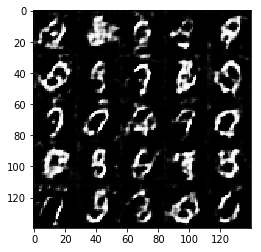

Epoch 1/2... Discriminator Loss: 0.5722... Generator Loss: 2.5860
Epoch 1/2... Discriminator Loss: 0.4856... Generator Loss: 4.5132
Epoch 1/2... Discriminator Loss: 0.5969... Generator Loss: 2.9748
Epoch 1/2... Discriminator Loss: 0.4961... Generator Loss: 2.9650
Epoch 1/2... Discriminator Loss: 0.6210... Generator Loss: 2.2141
Epoch 1/2... Discriminator Loss: 1.0727... Generator Loss: 3.9957
Epoch 1/2... Discriminator Loss: 0.5992... Generator Loss: 1.6741
Epoch 1/2... Discriminator Loss: 0.5901... Generator Loss: 1.6405
Epoch 1/2... Discriminator Loss: 1.0336... Generator Loss: 3.1996
Epoch 1/2... Discriminator Loss: 0.4817... Generator Loss: 3.1705


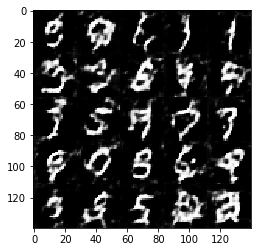

Epoch 1/2... Discriminator Loss: 0.7196... Generator Loss: 2.9519
Epoch 1/2... Discriminator Loss: 0.6250... Generator Loss: 2.2992
Epoch 1/2... Discriminator Loss: 0.5787... Generator Loss: 2.5550
Epoch 1/2... Discriminator Loss: 0.6068... Generator Loss: 1.7615
Epoch 1/2... Discriminator Loss: 0.5194... Generator Loss: 2.8956
Epoch 1/2... Discriminator Loss: 1.0140... Generator Loss: 1.0053
Epoch 1/2... Discriminator Loss: 0.6017... Generator Loss: 2.4713
Epoch 1/2... Discriminator Loss: 0.8944... Generator Loss: 2.1854
Epoch 1/2... Discriminator Loss: 0.9897... Generator Loss: 1.1721
Epoch 1/2... Discriminator Loss: 0.5713... Generator Loss: 2.2625


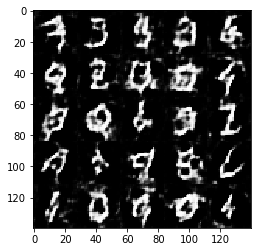

Epoch 1/2... Discriminator Loss: 0.5354... Generator Loss: 2.8855
Epoch 1/2... Discriminator Loss: 0.8969... Generator Loss: 3.9726
Epoch 1/2... Discriminator Loss: 0.5226... Generator Loss: 2.4797
Epoch 1/2... Discriminator Loss: 0.5792... Generator Loss: 1.8766
Epoch 1/2... Discriminator Loss: 1.1007... Generator Loss: 1.0933
Epoch 1/2... Discriminator Loss: 0.6747... Generator Loss: 2.5782
Epoch 1/2... Discriminator Loss: 0.6281... Generator Loss: 2.0565
Epoch 1/2... Discriminator Loss: 0.7609... Generator Loss: 1.0823
Epoch 1/2... Discriminator Loss: 0.6652... Generator Loss: 1.5794
Epoch 1/2... Discriminator Loss: 0.7646... Generator Loss: 1.5127


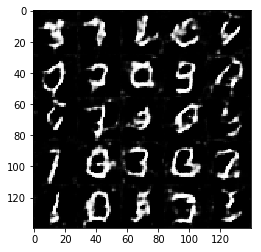

Epoch 1/2... Discriminator Loss: 0.5565... Generator Loss: 2.5806
Epoch 1/2... Discriminator Loss: 0.8190... Generator Loss: 2.5568
Epoch 1/2... Discriminator Loss: 0.8493... Generator Loss: 3.0714
Epoch 1/2... Discriminator Loss: 0.5525... Generator Loss: 2.4131
Epoch 1/2... Discriminator Loss: 0.7294... Generator Loss: 2.3239
Epoch 1/2... Discriminator Loss: 1.0184... Generator Loss: 3.5284
Epoch 1/2... Discriminator Loss: 0.7397... Generator Loss: 3.0950
Epoch 1/2... Discriminator Loss: 0.6227... Generator Loss: 1.8272
Epoch 1/2... Discriminator Loss: 0.7233... Generator Loss: 1.4790
Epoch 1/2... Discriminator Loss: 0.6905... Generator Loss: 2.0588


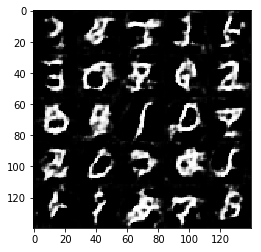

Epoch 1/2... Discriminator Loss: 0.8827... Generator Loss: 2.7241
Epoch 1/2... Discriminator Loss: 0.9594... Generator Loss: 4.1542
Epoch 1/2... Discriminator Loss: 1.0913... Generator Loss: 0.7092
Epoch 1/2... Discriminator Loss: 0.9595... Generator Loss: 1.3318
Epoch 1/2... Discriminator Loss: 0.6753... Generator Loss: 2.7608
Epoch 1/2... Discriminator Loss: 0.5574... Generator Loss: 2.2273
Epoch 1/2... Discriminator Loss: 0.6802... Generator Loss: 2.3844
Epoch 1/2... Discriminator Loss: 1.7433... Generator Loss: 0.9367
Epoch 1/2... Discriminator Loss: 1.7360... Generator Loss: 3.7781
Epoch 1/2... Discriminator Loss: 0.9321... Generator Loss: 1.8174


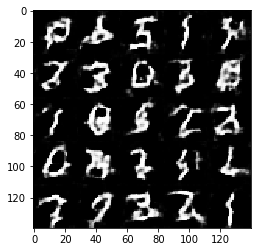

Epoch 1/2... Discriminator Loss: 0.6812... Generator Loss: 1.4782
Epoch 1/2... Discriminator Loss: 0.9533... Generator Loss: 1.5671
Epoch 1/2... Discriminator Loss: 1.4848... Generator Loss: 0.5752
Epoch 1/2... Discriminator Loss: 1.1604... Generator Loss: 0.8774
Epoch 1/2... Discriminator Loss: 0.6195... Generator Loss: 3.8574
Epoch 1/2... Discriminator Loss: 0.5484... Generator Loss: 2.1537
Epoch 1/2... Discriminator Loss: 0.4973... Generator Loss: 1.9904
Epoch 1/2... Discriminator Loss: 0.8748... Generator Loss: 0.9920
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 1.3015
Epoch 1/2... Discriminator Loss: 0.8908... Generator Loss: 1.5660


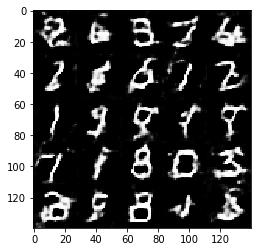

Epoch 1/2... Discriminator Loss: 0.7929... Generator Loss: 2.5313
Epoch 1/2... Discriminator Loss: 0.6583... Generator Loss: 1.6527
Epoch 1/2... Discriminator Loss: 0.7034... Generator Loss: 2.8595
Epoch 1/2... Discriminator Loss: 0.5377... Generator Loss: 2.8207
Epoch 1/2... Discriminator Loss: 0.9658... Generator Loss: 0.5834
Epoch 1/2... Discriminator Loss: 0.6111... Generator Loss: 1.8359
Epoch 1/2... Discriminator Loss: 0.6874... Generator Loss: 2.5436
Epoch 1/2... Discriminator Loss: 0.6025... Generator Loss: 2.2256
Epoch 1/2... Discriminator Loss: 0.6067... Generator Loss: 1.8615
Epoch 1/2... Discriminator Loss: 0.6468... Generator Loss: 1.3772


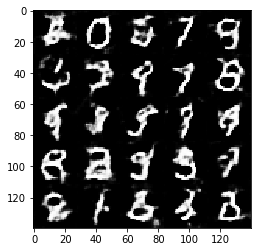

Epoch 1/2... Discriminator Loss: 0.8416... Generator Loss: 1.2286
Epoch 1/2... Discriminator Loss: 0.6425... Generator Loss: 3.0424
Epoch 1/2... Discriminator Loss: 0.7079... Generator Loss: 1.6037
Epoch 1/2... Discriminator Loss: 0.5152... Generator Loss: 2.5452
Epoch 1/2... Discriminator Loss: 0.7036... Generator Loss: 1.5102
Epoch 1/2... Discriminator Loss: 0.4740... Generator Loss: 2.8159
Epoch 1/2... Discriminator Loss: 0.8925... Generator Loss: 1.3634
Epoch 1/2... Discriminator Loss: 0.5315... Generator Loss: 2.3378
Epoch 1/2... Discriminator Loss: 0.7597... Generator Loss: 1.2083
Epoch 1/2... Discriminator Loss: 0.4906... Generator Loss: 2.0982


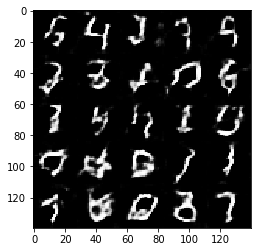

Epoch 1/2... Discriminator Loss: 0.6489... Generator Loss: 1.8570
Epoch 1/2... Discriminator Loss: 0.6187... Generator Loss: 2.1119
Epoch 1/2... Discriminator Loss: 0.6425... Generator Loss: 1.6190
Epoch 1/2... Discriminator Loss: 0.7674... Generator Loss: 1.9676
Epoch 1/2... Discriminator Loss: 0.6116... Generator Loss: 1.9330
Epoch 1/2... Discriminator Loss: 0.4912... Generator Loss: 3.4078
Epoch 1/2... Discriminator Loss: 0.8132... Generator Loss: 1.2322
Epoch 1/2... Discriminator Loss: 0.7078... Generator Loss: 1.1617
Epoch 1/2... Discriminator Loss: 0.6084... Generator Loss: 2.0604
Epoch 1/2... Discriminator Loss: 0.7600... Generator Loss: 1.7903


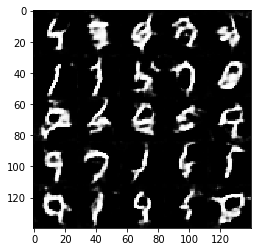

Epoch 1/2... Discriminator Loss: 0.6568... Generator Loss: 3.4272
Epoch 1/2... Discriminator Loss: 0.6156... Generator Loss: 2.1942
Epoch 1/2... Discriminator Loss: 0.8686... Generator Loss: 2.3411
Epoch 1/2... Discriminator Loss: 0.6261... Generator Loss: 3.0802
Epoch 1/2... Discriminator Loss: 0.5203... Generator Loss: 3.4437
Epoch 1/2... Discriminator Loss: 0.5575... Generator Loss: 2.1652
Epoch 1/2... Discriminator Loss: 1.0137... Generator Loss: 1.0866
Epoch 1/2... Discriminator Loss: 0.5786... Generator Loss: 3.3353
Epoch 1/2... Discriminator Loss: 0.4829... Generator Loss: 1.9972
Epoch 1/2... Discriminator Loss: 0.7203... Generator Loss: 2.3918


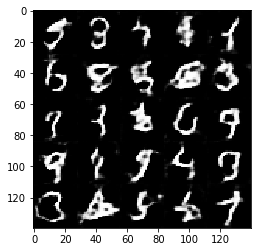

Epoch 1/2... Discriminator Loss: 0.7420... Generator Loss: 1.4684
Epoch 1/2... Discriminator Loss: 0.6015... Generator Loss: 1.9589
Epoch 1/2... Discriminator Loss: 0.5103... Generator Loss: 3.2014
Epoch 1/2... Discriminator Loss: 0.4620... Generator Loss: 2.7453
Epoch 1/2... Discriminator Loss: 0.5113... Generator Loss: 2.3647
Epoch 1/2... Discriminator Loss: 0.7665... Generator Loss: 1.7873
Epoch 1/2... Discriminator Loss: 0.5643... Generator Loss: 1.6809
Epoch 1/2... Discriminator Loss: 0.4839... Generator Loss: 2.4537
Epoch 1/2... Discriminator Loss: 0.5038... Generator Loss: 2.5631
Epoch 1/2... Discriminator Loss: 0.8102... Generator Loss: 1.1796


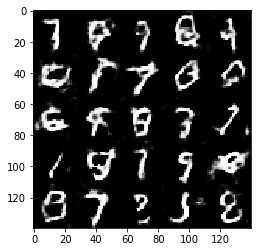

Epoch 1/2... Discriminator Loss: 0.8511... Generator Loss: 1.4536
Epoch 1/2... Discriminator Loss: 0.6329... Generator Loss: 1.8694
Epoch 1/2... Discriminator Loss: 0.6082... Generator Loss: 1.8936
Epoch 1/2... Discriminator Loss: 0.5648... Generator Loss: 1.9667
Epoch 1/2... Discriminator Loss: 0.6870... Generator Loss: 2.0220
Epoch 1/2... Discriminator Loss: 0.5013... Generator Loss: 1.8268
Epoch 1/2... Discriminator Loss: 0.6927... Generator Loss: 2.3214
Epoch 1/2... Discriminator Loss: 0.5283... Generator Loss: 1.8381
Epoch 1/2... Discriminator Loss: 0.7728... Generator Loss: 1.4069
Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 2.1017


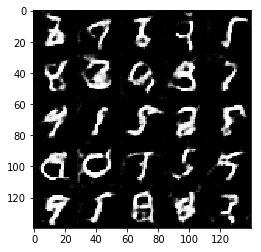

Epoch 1/2... Discriminator Loss: 0.5430... Generator Loss: 3.6487
Epoch 1/2... Discriminator Loss: 0.5456... Generator Loss: 2.2828
Epoch 1/2... Discriminator Loss: 0.4933... Generator Loss: 2.4669
Epoch 1/2... Discriminator Loss: 0.7521... Generator Loss: 2.4253
Epoch 1/2... Discriminator Loss: 0.5992... Generator Loss: 2.4468
Epoch 1/2... Discriminator Loss: 0.8196... Generator Loss: 3.0040
Epoch 1/2... Discriminator Loss: 0.5735... Generator Loss: 2.6171
Epoch 1/2... Discriminator Loss: 0.7219... Generator Loss: 1.7325
Epoch 1/2... Discriminator Loss: 0.7763... Generator Loss: 1.8356
Epoch 1/2... Discriminator Loss: 0.7346... Generator Loss: 1.6088


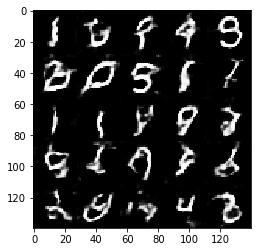

Epoch 1/2... Discriminator Loss: 0.9697... Generator Loss: 1.4767
Epoch 1/2... Discriminator Loss: 0.7864... Generator Loss: 2.0287
Epoch 1/2... Discriminator Loss: 0.5953... Generator Loss: 1.7756
Epoch 1/2... Discriminator Loss: 0.5738... Generator Loss: 2.5275
Epoch 1/2... Discriminator Loss: 0.8736... Generator Loss: 1.5566
Epoch 1/2... Discriminator Loss: 0.5343... Generator Loss: 2.9148
Epoch 1/2... Discriminator Loss: 0.7458... Generator Loss: 2.7870
Epoch 1/2... Discriminator Loss: 0.6261... Generator Loss: 1.7347
Epoch 1/2... Discriminator Loss: 0.5629... Generator Loss: 1.9386
Epoch 1/2... Discriminator Loss: 0.9682... Generator Loss: 3.0726


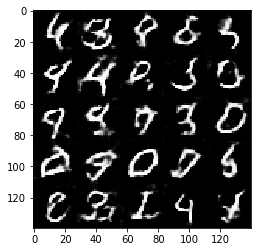

Epoch 1/2... Discriminator Loss: 0.5502... Generator Loss: 2.8316
Epoch 1/2... Discriminator Loss: 0.9832... Generator Loss: 1.3302
Epoch 1/2... Discriminator Loss: 0.5334... Generator Loss: 1.6139
Epoch 1/2... Discriminator Loss: 0.6166... Generator Loss: 1.6965
Epoch 1/2... Discriminator Loss: 1.0010... Generator Loss: 3.2005
Epoch 1/2... Discriminator Loss: 0.7573... Generator Loss: 1.1138
Epoch 1/2... Discriminator Loss: 0.5139... Generator Loss: 2.3244
Epoch 1/2... Discriminator Loss: 0.4838... Generator Loss: 3.1147
Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 2.2157
Epoch 1/2... Discriminator Loss: 0.5575... Generator Loss: 3.1108


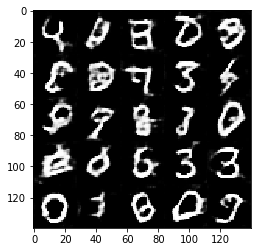

Epoch 1/2... Discriminator Loss: 0.5607... Generator Loss: 1.7020
Epoch 1/2... Discriminator Loss: 0.6382... Generator Loss: 2.1764
Epoch 1/2... Discriminator Loss: 0.7940... Generator Loss: 1.8823
Epoch 1/2... Discriminator Loss: 0.6649... Generator Loss: 1.5610
Epoch 1/2... Discriminator Loss: 0.5984... Generator Loss: 1.9740
Epoch 1/2... Discriminator Loss: 0.5348... Generator Loss: 2.4686
Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 0.9075
Epoch 1/2... Discriminator Loss: 0.6332... Generator Loss: 2.3420
Epoch 1/2... Discriminator Loss: 0.6788... Generator Loss: 2.7017
Epoch 1/2... Discriminator Loss: 0.8541... Generator Loss: 1.2999


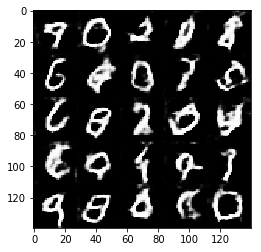

Epoch 1/2... Discriminator Loss: 0.9999... Generator Loss: 0.9678
Epoch 1/2... Discriminator Loss: 0.4544... Generator Loss: 2.6311
Epoch 1/2... Discriminator Loss: 0.5808... Generator Loss: 2.8500
Epoch 1/2... Discriminator Loss: 0.6517... Generator Loss: 1.4447
Epoch 1/2... Discriminator Loss: 0.6997... Generator Loss: 1.3978
Epoch 1/2... Discriminator Loss: 0.5225... Generator Loss: 2.7401
Epoch 1/2... Discriminator Loss: 0.5493... Generator Loss: 2.5680
Epoch 1/2... Discriminator Loss: 0.6038... Generator Loss: 1.8217
Epoch 1/2... Discriminator Loss: 0.7211... Generator Loss: 2.7843
Epoch 1/2... Discriminator Loss: 0.5877... Generator Loss: 2.4488


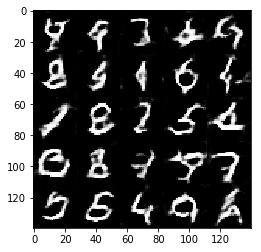

Epoch 1/2... Discriminator Loss: 0.5809... Generator Loss: 1.4513
Epoch 1/2... Discriminator Loss: 0.5278... Generator Loss: 2.3695
Epoch 1/2... Discriminator Loss: 0.5174... Generator Loss: 3.1822
Epoch 1/2... Discriminator Loss: 1.0446... Generator Loss: 1.4400
Epoch 1/2... Discriminator Loss: 0.8782... Generator Loss: 1.2286
Epoch 1/2... Discriminator Loss: 0.6064... Generator Loss: 1.9454
Epoch 1/2... Discriminator Loss: 0.9330... Generator Loss: 0.8838
Epoch 1/2... Discriminator Loss: 0.6283... Generator Loss: 2.7323
Epoch 1/2... Discriminator Loss: 0.5691... Generator Loss: 2.4224
Epoch 1/2... Discriminator Loss: 0.6452... Generator Loss: 3.1059


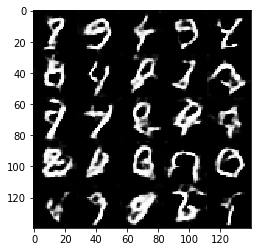

Epoch 1/2... Discriminator Loss: 0.6328... Generator Loss: 2.0910
Epoch 1/2... Discriminator Loss: 0.5612... Generator Loss: 2.3229
Epoch 1/2... Discriminator Loss: 0.5594... Generator Loss: 2.1388
Epoch 1/2... Discriminator Loss: 0.6040... Generator Loss: 1.5544
Epoch 1/2... Discriminator Loss: 0.6607... Generator Loss: 3.1776
Epoch 1/2... Discriminator Loss: 0.5150... Generator Loss: 2.2810
Epoch 1/2... Discriminator Loss: 0.6172... Generator Loss: 1.9406
Epoch 1/2... Discriminator Loss: 0.5161... Generator Loss: 2.6021
Epoch 1/2... Discriminator Loss: 0.4888... Generator Loss: 3.6773
Epoch 1/2... Discriminator Loss: 0.9606... Generator Loss: 0.9640


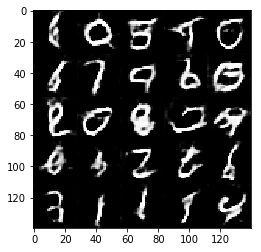

Epoch 1/2... Discriminator Loss: 0.8015... Generator Loss: 1.3018
Epoch 1/2... Discriminator Loss: 0.4655... Generator Loss: 1.7489
Epoch 1/2... Discriminator Loss: 0.6895... Generator Loss: 2.4226
Epoch 1/2... Discriminator Loss: 0.7690... Generator Loss: 2.1016
Epoch 1/2... Discriminator Loss: 0.7585... Generator Loss: 1.2199
Epoch 1/2... Discriminator Loss: 0.7387... Generator Loss: 1.7669
Epoch 1/2... Discriminator Loss: 0.7805... Generator Loss: 1.6592
Epoch 1/2... Discriminator Loss: 0.7705... Generator Loss: 1.9786
Epoch 1/2... Discriminator Loss: 1.0647... Generator Loss: 1.4152
Epoch 1/2... Discriminator Loss: 0.5951... Generator Loss: 1.8128


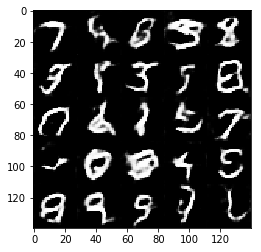

Epoch 1/2... Discriminator Loss: 0.6681... Generator Loss: 2.2239
Epoch 1/2... Discriminator Loss: 0.6178... Generator Loss: 2.7257
Epoch 1/2... Discriminator Loss: 0.6474... Generator Loss: 1.6832
Epoch 1/2... Discriminator Loss: 0.5943... Generator Loss: 1.8710
Epoch 1/2... Discriminator Loss: 0.4959... Generator Loss: 2.6305
Epoch 1/2... Discriminator Loss: 0.5993... Generator Loss: 2.6743
Epoch 1/2... Discriminator Loss: 0.5526... Generator Loss: 2.3378
Epoch 1/2... Discriminator Loss: 0.7726... Generator Loss: 1.5608
Epoch 1/2... Discriminator Loss: 0.5710... Generator Loss: 1.7232
Epoch 1/2... Discriminator Loss: 0.6411... Generator Loss: 1.7211


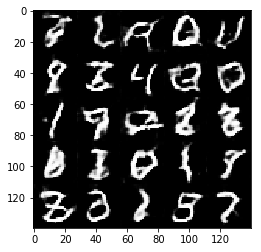

Epoch 1/2... Discriminator Loss: 0.4921... Generator Loss: 2.7400
Epoch 1/2... Discriminator Loss: 0.5694... Generator Loss: 2.3409
Epoch 1/2... Discriminator Loss: 0.5273... Generator Loss: 2.0499
Epoch 1/2... Discriminator Loss: 0.6356... Generator Loss: 1.2335
Epoch 1/2... Discriminator Loss: 0.5185... Generator Loss: 3.2596
Epoch 1/2... Discriminator Loss: 0.6630... Generator Loss: 4.2595
Epoch 1/2... Discriminator Loss: 0.5712... Generator Loss: 1.7269
Epoch 1/2... Discriminator Loss: 0.6739... Generator Loss: 1.7479
Epoch 1/2... Discriminator Loss: 0.6286... Generator Loss: 2.2492
Epoch 1/2... Discriminator Loss: 0.7342... Generator Loss: 1.7360


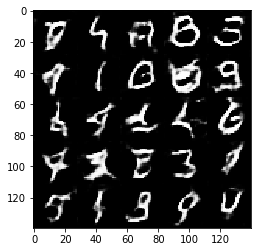

Epoch 1/2... Discriminator Loss: 0.6960... Generator Loss: 2.0000
Epoch 1/2... Discriminator Loss: 0.4598... Generator Loss: 3.6685
Epoch 1/2... Discriminator Loss: 0.6087... Generator Loss: 2.1129
Epoch 1/2... Discriminator Loss: 0.7302... Generator Loss: 2.3565
Epoch 1/2... Discriminator Loss: 1.0930... Generator Loss: 0.8073
Epoch 2/2... Discriminator Loss: 0.5840... Generator Loss: 2.2509
Epoch 2/2... Discriminator Loss: 0.5874... Generator Loss: 2.2262
Epoch 2/2... Discriminator Loss: 0.5140... Generator Loss: 2.0171
Epoch 2/2... Discriminator Loss: 0.7557... Generator Loss: 1.1663
Epoch 2/2... Discriminator Loss: 0.5414... Generator Loss: 2.6125


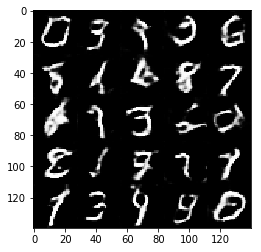

Epoch 2/2... Discriminator Loss: 0.5534... Generator Loss: 2.5037
Epoch 2/2... Discriminator Loss: 0.7687... Generator Loss: 1.7563
Epoch 2/2... Discriminator Loss: 0.7697... Generator Loss: 1.3492
Epoch 2/2... Discriminator Loss: 0.5757... Generator Loss: 2.7085
Epoch 2/2... Discriminator Loss: 0.5582... Generator Loss: 2.6483
Epoch 2/2... Discriminator Loss: 0.5354... Generator Loss: 2.3756
Epoch 2/2... Discriminator Loss: 0.5554... Generator Loss: 2.8555
Epoch 2/2... Discriminator Loss: 0.5628... Generator Loss: 2.6492
Epoch 2/2... Discriminator Loss: 0.5044... Generator Loss: 2.2056
Epoch 2/2... Discriminator Loss: 0.9881... Generator Loss: 1.4443


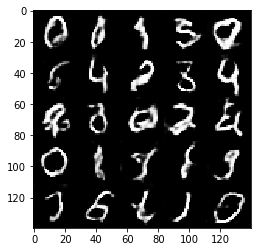

Epoch 2/2... Discriminator Loss: 0.5770... Generator Loss: 2.2956
Epoch 2/2... Discriminator Loss: 0.6000... Generator Loss: 2.2374
Epoch 2/2... Discriminator Loss: 0.5382... Generator Loss: 2.2316
Epoch 2/2... Discriminator Loss: 0.5201... Generator Loss: 1.7863
Epoch 2/2... Discriminator Loss: 0.6248... Generator Loss: 2.0358
Epoch 2/2... Discriminator Loss: 0.4996... Generator Loss: 2.3355
Epoch 2/2... Discriminator Loss: 0.5180... Generator Loss: 2.6266
Epoch 2/2... Discriminator Loss: 0.7351... Generator Loss: 1.6467
Epoch 2/2... Discriminator Loss: 0.6683... Generator Loss: 1.7071
Epoch 2/2... Discriminator Loss: 0.5335... Generator Loss: 2.1882


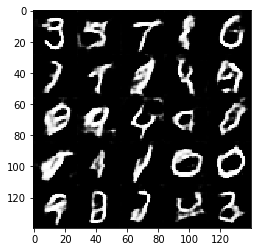

Epoch 2/2... Discriminator Loss: 0.7556... Generator Loss: 1.4262
Epoch 2/2... Discriminator Loss: 0.4953... Generator Loss: 2.3815
Epoch 2/2... Discriminator Loss: 0.5465... Generator Loss: 2.4665
Epoch 2/2... Discriminator Loss: 0.5688... Generator Loss: 2.2816
Epoch 2/2... Discriminator Loss: 0.6599... Generator Loss: 1.8352
Epoch 2/2... Discriminator Loss: 0.5230... Generator Loss: 2.3520
Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 1.4097
Epoch 2/2... Discriminator Loss: 0.4922... Generator Loss: 2.6633
Epoch 2/2... Discriminator Loss: 0.5895... Generator Loss: 2.1907
Epoch 2/2... Discriminator Loss: 0.5174... Generator Loss: 2.4998


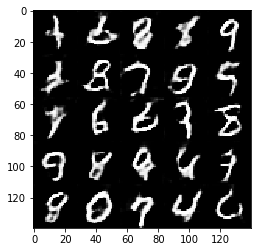

Epoch 2/2... Discriminator Loss: 0.6044... Generator Loss: 2.6761
Epoch 2/2... Discriminator Loss: 0.6056... Generator Loss: 2.4349
Epoch 2/2... Discriminator Loss: 0.6112... Generator Loss: 2.4677
Epoch 2/2... Discriminator Loss: 0.5340... Generator Loss: 2.5899
Epoch 2/2... Discriminator Loss: 0.6132... Generator Loss: 2.3081
Epoch 2/2... Discriminator Loss: 0.5565... Generator Loss: 2.6769
Epoch 2/2... Discriminator Loss: 0.4746... Generator Loss: 2.1116
Epoch 2/2... Discriminator Loss: 0.5852... Generator Loss: 2.4063
Epoch 2/2... Discriminator Loss: 0.6093... Generator Loss: 3.1634
Epoch 2/2... Discriminator Loss: 0.5148... Generator Loss: 2.6351


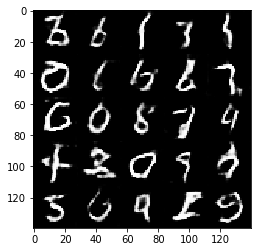

Epoch 2/2... Discriminator Loss: 0.6009... Generator Loss: 2.4120
Epoch 2/2... Discriminator Loss: 0.4714... Generator Loss: 2.8215
Epoch 2/2... Discriminator Loss: 0.5109... Generator Loss: 2.2034
Epoch 2/2... Discriminator Loss: 0.6779... Generator Loss: 1.5975
Epoch 2/2... Discriminator Loss: 0.4851... Generator Loss: 2.6195
Epoch 2/2... Discriminator Loss: 0.6110... Generator Loss: 2.4010
Epoch 2/2... Discriminator Loss: 0.7388... Generator Loss: 2.3409
Epoch 2/2... Discriminator Loss: 0.4986... Generator Loss: 1.9163
Epoch 2/2... Discriminator Loss: 0.4814... Generator Loss: 3.0100
Epoch 2/2... Discriminator Loss: 0.6547... Generator Loss: 2.0366


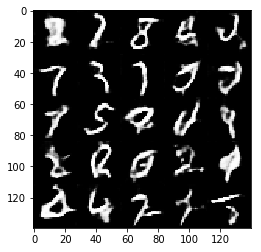

Epoch 2/2... Discriminator Loss: 0.5313... Generator Loss: 2.6104
Epoch 2/2... Discriminator Loss: 0.5148... Generator Loss: 2.2236
Epoch 2/2... Discriminator Loss: 0.6786... Generator Loss: 1.2703
Epoch 2/2... Discriminator Loss: 0.4521... Generator Loss: 2.3931
Epoch 2/2... Discriminator Loss: 0.5037... Generator Loss: 1.9237
Epoch 2/2... Discriminator Loss: 0.6827... Generator Loss: 2.4293
Epoch 2/2... Discriminator Loss: 0.5159... Generator Loss: 2.3042
Epoch 2/2... Discriminator Loss: 0.6640... Generator Loss: 2.6129
Epoch 2/2... Discriminator Loss: 0.5815... Generator Loss: 3.6820
Epoch 2/2... Discriminator Loss: 0.5637... Generator Loss: 3.2357


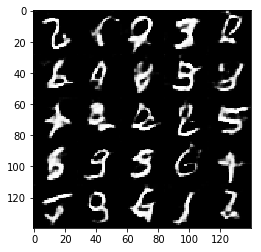

Epoch 2/2... Discriminator Loss: 0.4963... Generator Loss: 2.8245
Epoch 2/2... Discriminator Loss: 1.0073... Generator Loss: 1.4410
Epoch 2/2... Discriminator Loss: 0.8743... Generator Loss: 1.6171
Epoch 2/2... Discriminator Loss: 0.6962... Generator Loss: 1.5800
Epoch 2/2... Discriminator Loss: 1.7407... Generator Loss: 4.0137
Epoch 2/2... Discriminator Loss: 0.4763... Generator Loss: 2.3217
Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 1.8912
Epoch 2/2... Discriminator Loss: 0.4442... Generator Loss: 3.2914
Epoch 2/2... Discriminator Loss: 0.9106... Generator Loss: 1.6959
Epoch 2/2... Discriminator Loss: 0.7288... Generator Loss: 1.8778


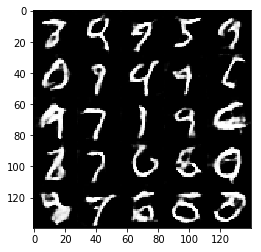

Epoch 2/2... Discriminator Loss: 0.8694... Generator Loss: 1.4091
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 1.3239
Epoch 2/2... Discriminator Loss: 0.4940... Generator Loss: 2.9117
Epoch 2/2... Discriminator Loss: 0.6220... Generator Loss: 2.3641
Epoch 2/2... Discriminator Loss: 0.5202... Generator Loss: 1.8459
Epoch 2/2... Discriminator Loss: 0.5921... Generator Loss: 3.3640
Epoch 2/2... Discriminator Loss: 0.7003... Generator Loss: 2.8263
Epoch 2/2... Discriminator Loss: 0.6626... Generator Loss: 2.6863
Epoch 2/2... Discriminator Loss: 0.5571... Generator Loss: 2.8567
Epoch 2/2... Discriminator Loss: 0.4564... Generator Loss: 2.5073


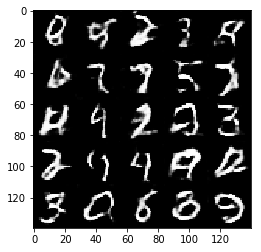

Epoch 2/2... Discriminator Loss: 0.7304... Generator Loss: 1.8244
Epoch 2/2... Discriminator Loss: 0.5773... Generator Loss: 2.4794
Epoch 2/2... Discriminator Loss: 0.5540... Generator Loss: 2.6038
Epoch 2/2... Discriminator Loss: 0.5105... Generator Loss: 2.3065
Epoch 2/2... Discriminator Loss: 0.7250... Generator Loss: 2.0767
Epoch 2/2... Discriminator Loss: 0.8532... Generator Loss: 1.5901
Epoch 2/2... Discriminator Loss: 0.8486... Generator Loss: 1.2514
Epoch 2/2... Discriminator Loss: 0.4604... Generator Loss: 2.6515
Epoch 2/2... Discriminator Loss: 0.8284... Generator Loss: 1.5411
Epoch 2/2... Discriminator Loss: 0.5299... Generator Loss: 2.5335


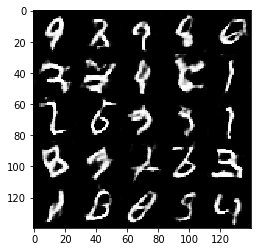

Epoch 2/2... Discriminator Loss: 0.4332... Generator Loss: 3.0858
Epoch 2/2... Discriminator Loss: 0.4731... Generator Loss: 2.4002
Epoch 2/2... Discriminator Loss: 0.6774... Generator Loss: 1.6471
Epoch 2/2... Discriminator Loss: 0.5285... Generator Loss: 2.7111
Epoch 2/2... Discriminator Loss: 1.1493... Generator Loss: 0.6312
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 2.5221
Epoch 2/2... Discriminator Loss: 0.6347... Generator Loss: 1.2771
Epoch 2/2... Discriminator Loss: 0.5344... Generator Loss: 2.1636
Epoch 2/2... Discriminator Loss: 0.4579... Generator Loss: 2.2278
Epoch 2/2... Discriminator Loss: 0.6371... Generator Loss: 2.7052


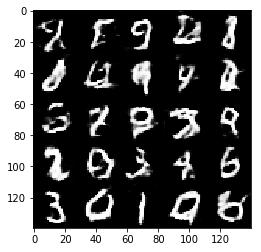

Epoch 2/2... Discriminator Loss: 0.4758... Generator Loss: 2.0382
Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 3.0791
Epoch 2/2... Discriminator Loss: 0.4364... Generator Loss: 2.0441
Epoch 2/2... Discriminator Loss: 0.4758... Generator Loss: 3.0916
Epoch 2/2... Discriminator Loss: 0.5189... Generator Loss: 3.1370
Epoch 2/2... Discriminator Loss: 0.4934... Generator Loss: 2.0030
Epoch 2/2... Discriminator Loss: 0.7534... Generator Loss: 2.0526
Epoch 2/2... Discriminator Loss: 0.5639... Generator Loss: 1.9441
Epoch 2/2... Discriminator Loss: 0.6644... Generator Loss: 3.0657
Epoch 2/2... Discriminator Loss: 0.4724... Generator Loss: 3.1826


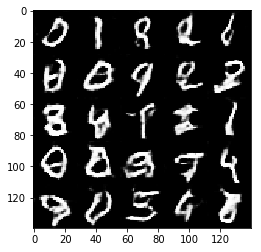

Epoch 2/2... Discriminator Loss: 0.5087... Generator Loss: 1.9053
Epoch 2/2... Discriminator Loss: 0.7386... Generator Loss: 3.2396
Epoch 2/2... Discriminator Loss: 0.6006... Generator Loss: 1.9419
Epoch 2/2... Discriminator Loss: 0.5861... Generator Loss: 1.8485
Epoch 2/2... Discriminator Loss: 0.5020... Generator Loss: 2.3788
Epoch 2/2... Discriminator Loss: 0.5244... Generator Loss: 2.6929
Epoch 2/2... Discriminator Loss: 0.7627... Generator Loss: 1.9747
Epoch 2/2... Discriminator Loss: 0.5236... Generator Loss: 3.2883
Epoch 2/2... Discriminator Loss: 0.6060... Generator Loss: 2.6572
Epoch 2/2... Discriminator Loss: 0.7050... Generator Loss: 1.7152


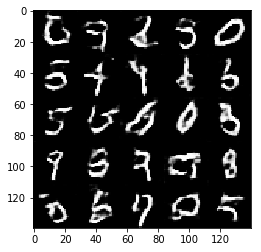

Epoch 2/2... Discriminator Loss: 0.5498... Generator Loss: 1.7101
Epoch 2/2... Discriminator Loss: 0.5502... Generator Loss: 3.0049
Epoch 2/2... Discriminator Loss: 1.4733... Generator Loss: 0.8530
Epoch 2/2... Discriminator Loss: 0.5537... Generator Loss: 2.0856
Epoch 2/2... Discriminator Loss: 0.5147... Generator Loss: 3.1409
Epoch 2/2... Discriminator Loss: 0.6394... Generator Loss: 2.7615
Epoch 2/2... Discriminator Loss: 0.6010... Generator Loss: 2.2888
Epoch 2/2... Discriminator Loss: 0.5196... Generator Loss: 1.8603
Epoch 2/2... Discriminator Loss: 0.6652... Generator Loss: 1.2761
Epoch 2/2... Discriminator Loss: 0.6231... Generator Loss: 1.9397


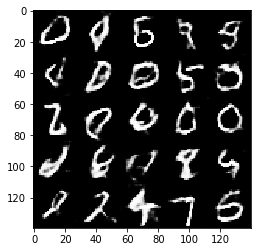

Epoch 2/2... Discriminator Loss: 0.6642... Generator Loss: 2.5711
Epoch 2/2... Discriminator Loss: 0.5049... Generator Loss: 2.8400
Epoch 2/2... Discriminator Loss: 0.4892... Generator Loss: 2.1427
Epoch 2/2... Discriminator Loss: 0.6232... Generator Loss: 2.2829
Epoch 2/2... Discriminator Loss: 0.4971... Generator Loss: 2.4824
Epoch 2/2... Discriminator Loss: 0.6778... Generator Loss: 2.2089
Epoch 2/2... Discriminator Loss: 0.4586... Generator Loss: 2.7781
Epoch 2/2... Discriminator Loss: 0.5962... Generator Loss: 2.7469
Epoch 2/2... Discriminator Loss: 0.4636... Generator Loss: 3.3680
Epoch 2/2... Discriminator Loss: 0.5139... Generator Loss: 3.0554


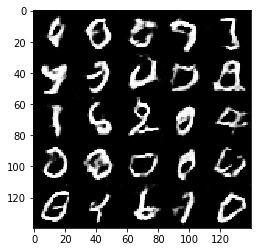

Epoch 2/2... Discriminator Loss: 0.5445... Generator Loss: 2.9356
Epoch 2/2... Discriminator Loss: 0.5133... Generator Loss: 2.3959
Epoch 2/2... Discriminator Loss: 0.6063... Generator Loss: 2.6043
Epoch 2/2... Discriminator Loss: 0.4653... Generator Loss: 2.3239
Epoch 2/2... Discriminator Loss: 0.6523... Generator Loss: 1.6862
Epoch 2/2... Discriminator Loss: 0.6980... Generator Loss: 1.7751
Epoch 2/2... Discriminator Loss: 0.4640... Generator Loss: 2.9487
Epoch 2/2... Discriminator Loss: 0.4096... Generator Loss: 3.1269
Epoch 2/2... Discriminator Loss: 0.6684... Generator Loss: 2.0675
Epoch 2/2... Discriminator Loss: 0.6129... Generator Loss: 2.0546


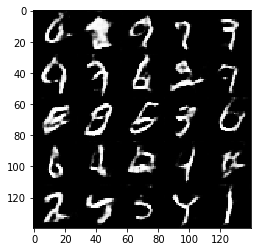

Epoch 2/2... Discriminator Loss: 0.6411... Generator Loss: 2.6570
Epoch 2/2... Discriminator Loss: 0.4464... Generator Loss: 2.7477
Epoch 2/2... Discriminator Loss: 0.4447... Generator Loss: 3.0592
Epoch 2/2... Discriminator Loss: 0.5991... Generator Loss: 2.1840
Epoch 2/2... Discriminator Loss: 0.5788... Generator Loss: 2.5166
Epoch 2/2... Discriminator Loss: 0.8761... Generator Loss: 4.2010
Epoch 2/2... Discriminator Loss: 0.4921... Generator Loss: 2.5968
Epoch 2/2... Discriminator Loss: 0.5426... Generator Loss: 2.3104
Epoch 2/2... Discriminator Loss: 0.6183... Generator Loss: 2.0583
Epoch 2/2... Discriminator Loss: 0.4208... Generator Loss: 3.2996


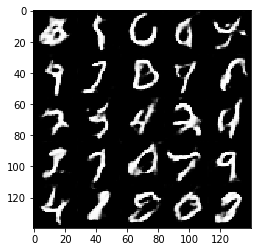

Epoch 2/2... Discriminator Loss: 1.1476... Generator Loss: 1.1561
Epoch 2/2... Discriminator Loss: 0.5473... Generator Loss: 2.3135
Epoch 2/2... Discriminator Loss: 0.5891... Generator Loss: 1.8914
Epoch 2/2... Discriminator Loss: 0.6345... Generator Loss: 3.6202
Epoch 2/2... Discriminator Loss: 0.4971... Generator Loss: 3.2221
Epoch 2/2... Discriminator Loss: 0.4992... Generator Loss: 2.7960
Epoch 2/2... Discriminator Loss: 0.6049... Generator Loss: 2.2394
Epoch 2/2... Discriminator Loss: 0.5435... Generator Loss: 2.3408
Epoch 2/2... Discriminator Loss: 0.4624... Generator Loss: 2.9877
Epoch 2/2... Discriminator Loss: 0.6655... Generator Loss: 1.7953


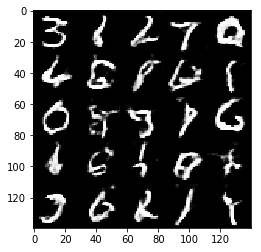

Epoch 2/2... Discriminator Loss: 0.5130... Generator Loss: 1.7972
Epoch 2/2... Discriminator Loss: 0.4895... Generator Loss: 2.1158
Epoch 2/2... Discriminator Loss: 0.9054... Generator Loss: 1.2498
Epoch 2/2... Discriminator Loss: 0.4428... Generator Loss: 3.2612
Epoch 2/2... Discriminator Loss: 0.8989... Generator Loss: 1.3555
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 1.9504
Epoch 2/2... Discriminator Loss: 0.4818... Generator Loss: 3.2642
Epoch 2/2... Discriminator Loss: 0.5679... Generator Loss: 2.2540
Epoch 2/2... Discriminator Loss: 0.4639... Generator Loss: 2.8202
Epoch 2/2... Discriminator Loss: 0.4775... Generator Loss: 3.5940


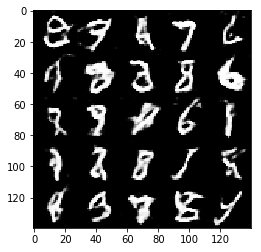

Epoch 2/2... Discriminator Loss: 0.5262... Generator Loss: 2.5417
Epoch 2/2... Discriminator Loss: 0.4908... Generator Loss: 2.5165
Epoch 2/2... Discriminator Loss: 0.7865... Generator Loss: 1.3412
Epoch 2/2... Discriminator Loss: 0.5837... Generator Loss: 3.0484
Epoch 2/2... Discriminator Loss: 0.5509... Generator Loss: 2.7137
Epoch 2/2... Discriminator Loss: 0.5594... Generator Loss: 2.2705
Epoch 2/2... Discriminator Loss: 0.4813... Generator Loss: 2.7245
Epoch 2/2... Discriminator Loss: 0.6822... Generator Loss: 2.1169
Epoch 2/2... Discriminator Loss: 0.4717... Generator Loss: 2.7852
Epoch 2/2... Discriminator Loss: 0.5584... Generator Loss: 3.5509


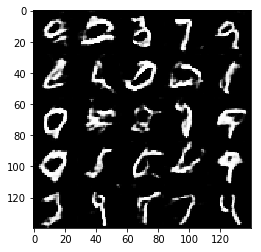

Epoch 2/2... Discriminator Loss: 0.4448... Generator Loss: 3.1454
Epoch 2/2... Discriminator Loss: 0.4773... Generator Loss: 2.9842
Epoch 2/2... Discriminator Loss: 0.6726... Generator Loss: 2.5633
Epoch 2/2... Discriminator Loss: 0.8170... Generator Loss: 4.2085
Epoch 2/2... Discriminator Loss: 0.6456... Generator Loss: 1.4822
Epoch 2/2... Discriminator Loss: 1.2014... Generator Loss: 1.1019
Epoch 2/2... Discriminator Loss: 0.5651... Generator Loss: 2.3342
Epoch 2/2... Discriminator Loss: 0.6432... Generator Loss: 2.8297
Epoch 2/2... Discriminator Loss: 0.4455... Generator Loss: 3.1839
Epoch 2/2... Discriminator Loss: 0.4809... Generator Loss: 2.9090


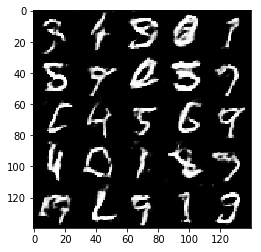

Epoch 2/2... Discriminator Loss: 0.4577... Generator Loss: 3.3898
Epoch 2/2... Discriminator Loss: 0.4705... Generator Loss: 2.5639
Epoch 2/2... Discriminator Loss: 0.9330... Generator Loss: 1.8336
Epoch 2/2... Discriminator Loss: 0.8044... Generator Loss: 3.1595
Epoch 2/2... Discriminator Loss: 0.5031... Generator Loss: 2.5010
Epoch 2/2... Discriminator Loss: 0.5911... Generator Loss: 2.0497
Epoch 2/2... Discriminator Loss: 0.5671... Generator Loss: 2.1936
Epoch 2/2... Discriminator Loss: 0.4821... Generator Loss: 2.9394
Epoch 2/2... Discriminator Loss: 0.4225... Generator Loss: 3.5142
Epoch 2/2... Discriminator Loss: 0.7577... Generator Loss: 1.4879


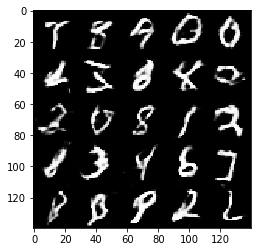

Epoch 2/2... Discriminator Loss: 0.7006... Generator Loss: 1.4682
Epoch 2/2... Discriminator Loss: 0.5947... Generator Loss: 3.4219
Epoch 2/2... Discriminator Loss: 0.6854... Generator Loss: 1.7463
Epoch 2/2... Discriminator Loss: 0.4241... Generator Loss: 3.3468
Epoch 2/2... Discriminator Loss: 0.5468... Generator Loss: 2.1549
Epoch 2/2... Discriminator Loss: 0.7401... Generator Loss: 2.0966
Epoch 2/2... Discriminator Loss: 0.5589... Generator Loss: 3.0819
Epoch 2/2... Discriminator Loss: 0.4846... Generator Loss: 2.3953
Epoch 2/2... Discriminator Loss: 0.5862... Generator Loss: 2.8860
Epoch 2/2... Discriminator Loss: 0.4984... Generator Loss: 2.7345


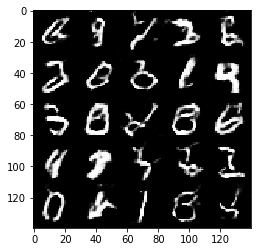

Epoch 2/2... Discriminator Loss: 0.4626... Generator Loss: 2.6094
Epoch 2/2... Discriminator Loss: 0.6828... Generator Loss: 2.6414
Epoch 2/2... Discriminator Loss: 0.6517... Generator Loss: 2.3191
Epoch 2/2... Discriminator Loss: 0.4129... Generator Loss: 3.0269
Epoch 2/2... Discriminator Loss: 0.4003... Generator Loss: 4.0574
Epoch 2/2... Discriminator Loss: 0.5492... Generator Loss: 1.8594
Epoch 2/2... Discriminator Loss: 0.5369... Generator Loss: 2.6249
Epoch 2/2... Discriminator Loss: 0.4874... Generator Loss: 2.6934
Epoch 2/2... Discriminator Loss: 0.4348... Generator Loss: 2.9917
Epoch 2/2... Discriminator Loss: 0.5250... Generator Loss: 3.2525


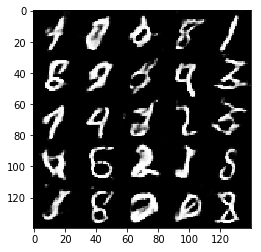

Epoch 2/2... Discriminator Loss: 0.6166... Generator Loss: 3.7055
Epoch 2/2... Discriminator Loss: 0.7049... Generator Loss: 1.5765
Epoch 2/2... Discriminator Loss: 0.4621... Generator Loss: 3.2102
Epoch 2/2... Discriminator Loss: 0.7231... Generator Loss: 1.2776
Epoch 2/2... Discriminator Loss: 0.5028... Generator Loss: 3.3845
Epoch 2/2... Discriminator Loss: 0.5477... Generator Loss: 2.2004
Epoch 2/2... Discriminator Loss: 0.5407... Generator Loss: 3.9945
Epoch 2/2... Discriminator Loss: 0.5390... Generator Loss: 3.5988
Epoch 2/2... Discriminator Loss: 0.4771... Generator Loss: 1.9452
Epoch 2/2... Discriminator Loss: 0.5473... Generator Loss: 1.9631


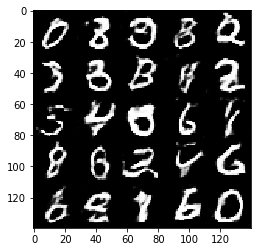

Epoch 2/2... Discriminator Loss: 0.4884... Generator Loss: 3.1483
Epoch 2/2... Discriminator Loss: 0.5983... Generator Loss: 1.6145
Epoch 2/2... Discriminator Loss: 0.5047... Generator Loss: 2.1982
Epoch 2/2... Discriminator Loss: 0.5244... Generator Loss: 3.1152
Epoch 2/2... Discriminator Loss: 0.4253... Generator Loss: 3.3813
Epoch 2/2... Discriminator Loss: 0.4537... Generator Loss: 3.7918
Epoch 2/2... Discriminator Loss: 0.4181... Generator Loss: 3.2548
Epoch 2/2... Discriminator Loss: 0.5196... Generator Loss: 1.8433
Epoch 2/2... Discriminator Loss: 0.4186... Generator Loss: 2.3455
Epoch 2/2... Discriminator Loss: 0.5717... Generator Loss: 2.7941


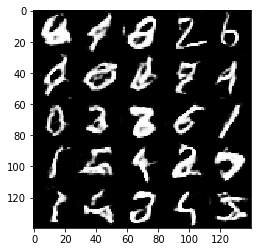

Epoch 2/2... Discriminator Loss: 0.5858... Generator Loss: 2.1899
Epoch 2/2... Discriminator Loss: 0.4672... Generator Loss: 3.4057
Epoch 2/2... Discriminator Loss: 0.5745... Generator Loss: 2.7718
Epoch 2/2... Discriminator Loss: 0.6038... Generator Loss: 2.0039
Epoch 2/2... Discriminator Loss: 0.5680... Generator Loss: 2.0450
Epoch 2/2... Discriminator Loss: 0.5990... Generator Loss: 1.7810
Epoch 2/2... Discriminator Loss: 0.5453... Generator Loss: 2.6810
Epoch 2/2... Discriminator Loss: 0.5565... Generator Loss: 2.0137
Epoch 2/2... Discriminator Loss: 0.5073... Generator Loss: 3.0706
Epoch 2/2... Discriminator Loss: 0.7353... Generator Loss: 1.2156


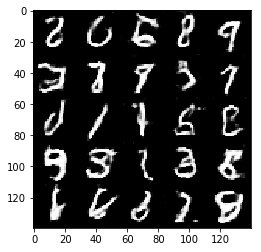

Epoch 2/2... Discriminator Loss: 0.6135... Generator Loss: 2.2195
Epoch 2/2... Discriminator Loss: 0.8176... Generator Loss: 2.1486
Epoch 2/2... Discriminator Loss: 0.5409... Generator Loss: 3.4910
Epoch 2/2... Discriminator Loss: 0.5696... Generator Loss: 2.7169
Epoch 2/2... Discriminator Loss: 0.5232... Generator Loss: 3.0066
Epoch 2/2... Discriminator Loss: 0.9121... Generator Loss: 3.6237
Epoch 2/2... Discriminator Loss: 0.4350... Generator Loss: 3.2278
Epoch 2/2... Discriminator Loss: 0.5033... Generator Loss: 2.6993
Epoch 2/2... Discriminator Loss: 0.6944... Generator Loss: 3.0240
Epoch 2/2... Discriminator Loss: 0.6642... Generator Loss: 4.5369


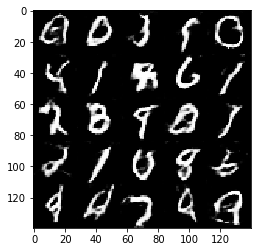

Epoch 2/2... Discriminator Loss: 0.5463... Generator Loss: 2.9193
Epoch 2/2... Discriminator Loss: 0.4222... Generator Loss: 2.0312
Epoch 2/2... Discriminator Loss: 0.7747... Generator Loss: 3.9150
Epoch 2/2... Discriminator Loss: 1.9401... Generator Loss: 0.7056
Epoch 2/2... Discriminator Loss: 0.4587... Generator Loss: 3.8458
Epoch 2/2... Discriminator Loss: 0.4903... Generator Loss: 3.6850
Epoch 2/2... Discriminator Loss: 0.5335... Generator Loss: 2.5939
Epoch 2/2... Discriminator Loss: 0.4709... Generator Loss: 3.1391
Epoch 2/2... Discriminator Loss: 0.3954... Generator Loss: 3.5924
Epoch 2/2... Discriminator Loss: 0.5461... Generator Loss: 2.0892


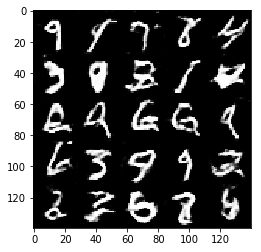

Epoch 2/2... Discriminator Loss: 0.4519... Generator Loss: 3.6992
Epoch 2/2... Discriminator Loss: 0.4599... Generator Loss: 2.9058
Epoch 2/2... Discriminator Loss: 0.4607... Generator Loss: 3.8041
Epoch 2/2... Discriminator Loss: 0.5021... Generator Loss: 2.8788
Epoch 2/2... Discriminator Loss: 0.4383... Generator Loss: 2.6894
Epoch 2/2... Discriminator Loss: 0.5456... Generator Loss: 2.3874
Epoch 2/2... Discriminator Loss: 0.5037... Generator Loss: 2.2719
Epoch 2/2... Discriminator Loss: 0.4690... Generator Loss: 2.0061
Epoch 2/2... Discriminator Loss: 0.4736... Generator Loss: 3.1102
Epoch 2/2... Discriminator Loss: 0.5838... Generator Loss: 2.3760


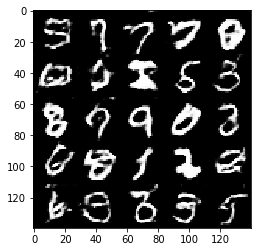

Epoch 2/2... Discriminator Loss: 1.2644... Generator Loss: 1.0043
Epoch 2/2... Discriminator Loss: 0.4590... Generator Loss: 3.4228
Epoch 2/2... Discriminator Loss: 0.4951... Generator Loss: 2.6774
Epoch 2/2... Discriminator Loss: 0.4950... Generator Loss: 2.4410
Epoch 2/2... Discriminator Loss: 0.5487... Generator Loss: 3.0441
Epoch 2/2... Discriminator Loss: 0.7205... Generator Loss: 1.4653
Epoch 2/2... Discriminator Loss: 0.5023... Generator Loss: 3.3217
Epoch 2/2... Discriminator Loss: 0.4266... Generator Loss: 2.9622
Epoch 2/2... Discriminator Loss: 0.5567... Generator Loss: 2.3034
Epoch 2/2... Discriminator Loss: 0.4944... Generator Loss: 3.0668


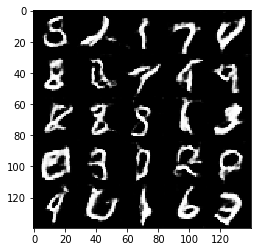

Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.7987
Epoch 2/2... Discriminator Loss: 0.4875... Generator Loss: 2.4645
Epoch 2/2... Discriminator Loss: 0.4789... Generator Loss: 2.6480
Epoch 2/2... Discriminator Loss: 0.5157... Generator Loss: 2.2553
Epoch 2/2... Discriminator Loss: 0.5084... Generator Loss: 2.7028
Epoch 2/2... Discriminator Loss: 1.2692... Generator Loss: 1.1132
Epoch 2/2... Discriminator Loss: 0.4765... Generator Loss: 3.4388
Epoch 2/2... Discriminator Loss: 0.4095... Generator Loss: 2.6899
Epoch 2/2... Discriminator Loss: 1.0264... Generator Loss: 3.9418
Epoch 2/2... Discriminator Loss: 0.5354... Generator Loss: 3.4762


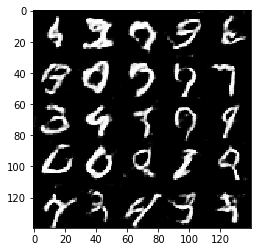

Epoch 2/2... Discriminator Loss: 0.5647... Generator Loss: 3.0857
Epoch 2/2... Discriminator Loss: 0.5656... Generator Loss: 2.0296
Epoch 2/2... Discriminator Loss: 0.6669... Generator Loss: 1.6452
Epoch 2/2... Discriminator Loss: 0.5131... Generator Loss: 2.0196
Epoch 2/2... Discriminator Loss: 0.4683... Generator Loss: 3.2926
Epoch 2/2... Discriminator Loss: 0.5228... Generator Loss: 3.4932
Epoch 2/2... Discriminator Loss: 0.4793... Generator Loss: 1.8808
Epoch 2/2... Discriminator Loss: 0.4958... Generator Loss: 2.5412
Epoch 2/2... Discriminator Loss: 0.7606... Generator Loss: 1.6226
Epoch 2/2... Discriminator Loss: 0.4876... Generator Loss: 3.0879


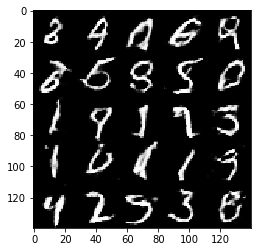

Epoch 2/2... Discriminator Loss: 0.4936... Generator Loss: 2.8486
Epoch 2/2... Discriminator Loss: 1.5400... Generator Loss: 0.3205
Epoch 2/2... Discriminator Loss: 0.6549... Generator Loss: 1.0336
Epoch 2/2... Discriminator Loss: 1.4405... Generator Loss: 4.4856
Epoch 2/2... Discriminator Loss: 0.5532... Generator Loss: 1.6823
Epoch 2/2... Discriminator Loss: 0.5155... Generator Loss: 3.4300
Epoch 2/2... Discriminator Loss: 0.7984... Generator Loss: 3.0083
Epoch 2/2... Discriminator Loss: 0.4555... Generator Loss: 2.4314
Epoch 2/2... Discriminator Loss: 0.8196... Generator Loss: 1.3155
Epoch 2/2... Discriminator Loss: 0.4646... Generator Loss: 3.0191


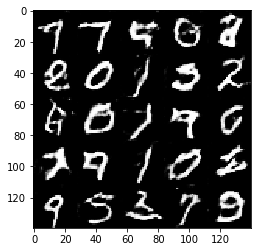

Epoch 2/2... Discriminator Loss: 0.4256... Generator Loss: 3.2501
Epoch 2/2... Discriminator Loss: 0.5070... Generator Loss: 3.0450
Epoch 2/2... Discriminator Loss: 0.4201... Generator Loss: 3.0627
Epoch 2/2... Discriminator Loss: 0.5625... Generator Loss: 2.7723
Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 2.7044
Epoch 2/2... Discriminator Loss: 0.5553... Generator Loss: 2.1648
Epoch 2/2... Discriminator Loss: 0.5839... Generator Loss: 1.9914
Epoch 2/2... Discriminator Loss: 0.5810... Generator Loss: 1.9550
Epoch 2/2... Discriminator Loss: 0.4806... Generator Loss: 2.0939
Epoch 2/2... Discriminator Loss: 1.1876... Generator Loss: 1.0338


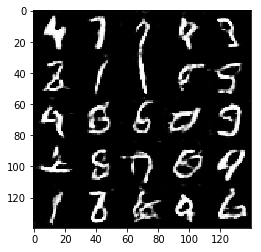

Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 1.3609
Epoch 2/2... Discriminator Loss: 0.8258... Generator Loss: 1.4471
Epoch 2/2... Discriminator Loss: 0.4734... Generator Loss: 1.8770
Epoch 2/2... Discriminator Loss: 0.5252... Generator Loss: 1.3866
Epoch 2/2... Discriminator Loss: 0.5370... Generator Loss: 1.8970
Epoch 2/2... Discriminator Loss: 0.4351... Generator Loss: 3.3612
Epoch 2/2... Discriminator Loss: 0.4474... Generator Loss: 3.7702
Epoch 2/2... Discriminator Loss: 0.7819... Generator Loss: 1.5888
Epoch 2/2... Discriminator Loss: 0.4828... Generator Loss: 2.6123
Epoch 2/2... Discriminator Loss: 0.4164... Generator Loss: 3.2836


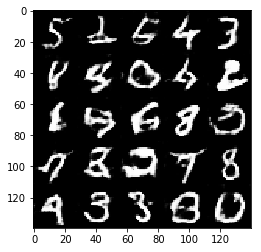

Epoch 2/2... Discriminator Loss: 0.4343... Generator Loss: 3.4229
Epoch 2/2... Discriminator Loss: 0.4878... Generator Loss: 3.1007
Epoch 2/2... Discriminator Loss: 0.5050... Generator Loss: 2.7425
Epoch 2/2... Discriminator Loss: 0.5347... Generator Loss: 2.1542
Epoch 2/2... Discriminator Loss: 0.4564... Generator Loss: 2.9993
Epoch 2/2... Discriminator Loss: 0.4596... Generator Loss: 3.8441
Epoch 2/2... Discriminator Loss: 0.4241... Generator Loss: 3.0012
Epoch 2/2... Discriminator Loss: 0.4845... Generator Loss: 3.0893
Epoch 2/2... Discriminator Loss: 0.5010... Generator Loss: 2.1858
Epoch 2/2... Discriminator Loss: 0.4190... Generator Loss: 3.0537


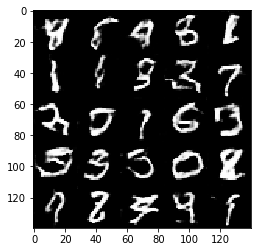

Epoch 2/2... Discriminator Loss: 0.4586... Generator Loss: 4.2755
Epoch 2/2... Discriminator Loss: 0.4710... Generator Loss: 3.3918
Epoch 2/2... Discriminator Loss: 0.4758... Generator Loss: 2.7437
Epoch 2/2... Discriminator Loss: 0.3852... Generator Loss: 3.8073
Epoch 2/2... Discriminator Loss: 0.4401... Generator Loss: 3.7801
Epoch 2/2... Discriminator Loss: 0.5559... Generator Loss: 3.6405
Epoch 2/2... Discriminator Loss: 0.4345... Generator Loss: 3.6515
Epoch 2/2... Discriminator Loss: 1.7806... Generator Loss: 0.8423
Epoch 2/2... Discriminator Loss: 0.5068... Generator Loss: 2.6676
Epoch 2/2... Discriminator Loss: 0.5900... Generator Loss: 2.4707


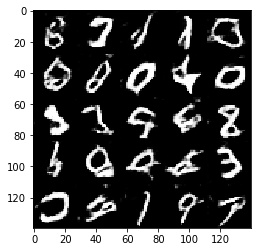

In [18]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4219... Generator Loss: 3.2125
Epoch 1/1... Discriminator Loss: 0.4584... Generator Loss: 3.3471
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 7.1736
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 2.3169
Epoch 1/1... Discriminator Loss: 0.4832... Generator Loss: 3.5885
Epoch 1/1... Discriminator Loss: 0.5519... Generator Loss: 4.0338
Epoch 1/1... Discriminator Loss: 0.4679... Generator Loss: 2.8132
Epoch 1/1... Discriminator Loss: 0.4418... Generator Loss: 4.1774
Epoch 1/1... Discriminator Loss: 0.5277... Generator Loss: 2.9524
Epoch 1/1... Discriminator Loss: 0.3930... Generator Loss: 3.9940


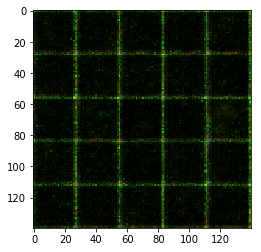

Epoch 1/1... Discriminator Loss: 0.3811... Generator Loss: 4.9575
Epoch 1/1... Discriminator Loss: 0.3544... Generator Loss: 5.3273
Epoch 1/1... Discriminator Loss: 0.3578... Generator Loss: 4.7752
Epoch 1/1... Discriminator Loss: 0.3603... Generator Loss: 5.7439
Epoch 1/1... Discriminator Loss: 0.3768... Generator Loss: 3.7487
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 1.2565
Epoch 1/1... Discriminator Loss: 0.4806... Generator Loss: 5.8252
Epoch 1/1... Discriminator Loss: 0.4410... Generator Loss: 5.6977
Epoch 1/1... Discriminator Loss: 0.3505... Generator Loss: 5.5737
Epoch 1/1... Discriminator Loss: 1.9594... Generator Loss: 7.4663


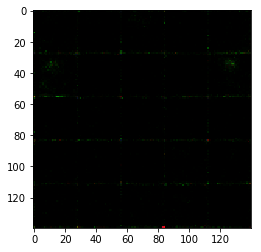

Epoch 1/1... Discriminator Loss: 0.3962... Generator Loss: 4.4435
Epoch 1/1... Discriminator Loss: 2.3099... Generator Loss: 3.6814
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 0.9588
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 1.9315
Epoch 1/1... Discriminator Loss: 0.5650... Generator Loss: 2.3417
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 0.8927
Epoch 1/1... Discriminator Loss: 0.8072... Generator Loss: 1.3971
Epoch 1/1... Discriminator Loss: 1.0518... Generator Loss: 1.0143
Epoch 1/1... Discriminator Loss: 0.6847... Generator Loss: 1.6402
Epoch 1/1... Discriminator Loss: 0.7944... Generator Loss: 1.4307


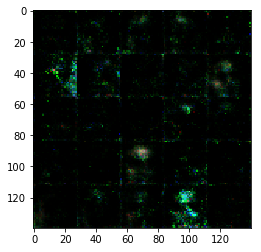

Epoch 1/1... Discriminator Loss: 0.9956... Generator Loss: 1.9166
Epoch 1/1... Discriminator Loss: 0.6115... Generator Loss: 1.5969
Epoch 1/1... Discriminator Loss: 0.4622... Generator Loss: 3.0604
Epoch 1/1... Discriminator Loss: 0.8915... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 0.9270... Generator Loss: 1.1541
Epoch 1/1... Discriminator Loss: 2.8141... Generator Loss: 4.9386
Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.9303
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 1.3733
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 1.1393
Epoch 1/1... Discriminator Loss: 0.7270... Generator Loss: 1.6430


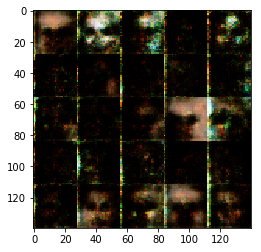

Epoch 1/1... Discriminator Loss: 0.6237... Generator Loss: 1.7993
Epoch 1/1... Discriminator Loss: 0.6896... Generator Loss: 1.5275
Epoch 1/1... Discriminator Loss: 0.4352... Generator Loss: 2.7123
Epoch 1/1... Discriminator Loss: 0.8140... Generator Loss: 1.6558
Epoch 1/1... Discriminator Loss: 0.5917... Generator Loss: 1.9157
Epoch 1/1... Discriminator Loss: 2.2892... Generator Loss: 0.2478
Epoch 1/1... Discriminator Loss: 0.8195... Generator Loss: 1.2551
Epoch 1/1... Discriminator Loss: 0.5155... Generator Loss: 2.3705
Epoch 1/1... Discriminator Loss: 0.9268... Generator Loss: 0.9954
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.9225


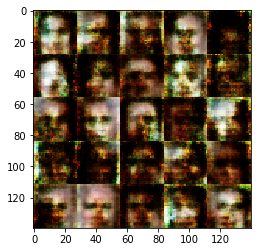

Epoch 1/1... Discriminator Loss: 0.8525... Generator Loss: 1.2982
Epoch 1/1... Discriminator Loss: 0.4263... Generator Loss: 3.6981
Epoch 1/1... Discriminator Loss: 0.9216... Generator Loss: 1.4028
Epoch 1/1... Discriminator Loss: 0.4198... Generator Loss: 3.0080
Epoch 1/1... Discriminator Loss: 2.0419... Generator Loss: 0.3661
Epoch 1/1... Discriminator Loss: 0.8963... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.9933
Epoch 1/1... Discriminator Loss: 2.1808... Generator Loss: 2.0753
Epoch 1/1... Discriminator Loss: 1.0719... Generator Loss: 1.2580
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 1.1291


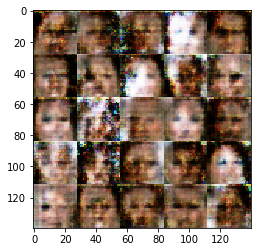

Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 1.0385
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 0.4805... Generator Loss: 3.0017
Epoch 1/1... Discriminator Loss: 0.9992... Generator Loss: 0.9682
Epoch 1/1... Discriminator Loss: 0.8149... Generator Loss: 1.1433
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 0.8781
Epoch 1/1... Discriminator Loss: 0.4791... Generator Loss: 2.2313
Epoch 1/1... Discriminator Loss: 0.6674... Generator Loss: 1.8391
Epoch 1/1... Discriminator Loss: 0.9863... Generator Loss: 1.7798


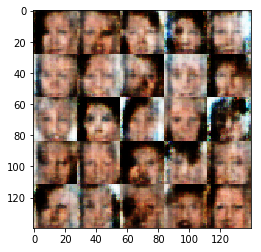

Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 1.2070
Epoch 1/1... Discriminator Loss: 1.0349... Generator Loss: 1.2006
Epoch 1/1... Discriminator Loss: 0.9933... Generator Loss: 1.3702
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.1534
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 1.0464
Epoch 1/1... Discriminator Loss: 0.6423... Generator Loss: 1.7837
Epoch 1/1... Discriminator Loss: 0.7074... Generator Loss: 1.8606
Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 2.8343
Epoch 1/1... Discriminator Loss: 1.8900... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 1.0703... Generator Loss: 2.0040


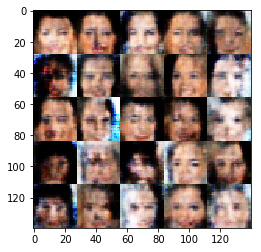

Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.1658
Epoch 1/1... Discriminator Loss: 0.8315... Generator Loss: 1.3084
Epoch 1/1... Discriminator Loss: 0.9495... Generator Loss: 2.5300
Epoch 1/1... Discriminator Loss: 0.9154... Generator Loss: 2.5704
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.7476
Epoch 1/1... Discriminator Loss: 0.6766... Generator Loss: 1.4782
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 2.4433
Epoch 1/1... Discriminator Loss: 1.0124... Generator Loss: 2.1912
Epoch 1/1... Discriminator Loss: 0.7294... Generator Loss: 1.3850
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.2943


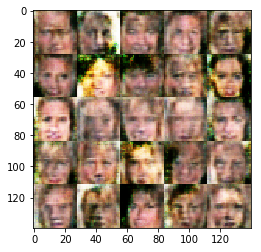

Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 1.4953
Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 0.7263
Epoch 1/1... Discriminator Loss: 1.5287... Generator Loss: 2.6818
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 1.3376
Epoch 1/1... Discriminator Loss: 1.0124... Generator Loss: 1.3449
Epoch 1/1... Discriminator Loss: 0.8930... Generator Loss: 1.0861
Epoch 1/1... Discriminator Loss: 0.9924... Generator Loss: 1.1197
Epoch 1/1... Discriminator Loss: 1.0018... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 0.9010... Generator Loss: 2.0618
Epoch 1/1... Discriminator Loss: 0.8058... Generator Loss: 1.5125


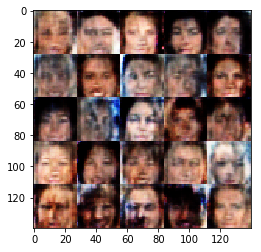

Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 1.9867
Epoch 1/1... Discriminator Loss: 1.1690... Generator Loss: 2.0485
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.5333
Epoch 1/1... Discriminator Loss: 0.8144... Generator Loss: 1.1709
Epoch 1/1... Discriminator Loss: 1.7132... Generator Loss: 2.7298
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 2.4376
Epoch 1/1... Discriminator Loss: 0.7322... Generator Loss: 1.4886
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 2.7472
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 0.8728... Generator Loss: 1.4975


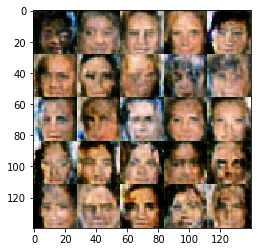

Epoch 1/1... Discriminator Loss: 1.6531... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 1.7251... Generator Loss: 3.0197
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 2.0784
Epoch 1/1... Discriminator Loss: 1.0506... Generator Loss: 0.9009
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 0.9194... Generator Loss: 1.1106
Epoch 1/1... Discriminator Loss: 0.7423... Generator Loss: 1.8117
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 0.9631
Epoch 1/1... Discriminator Loss: 0.4045... Generator Loss: 3.9519
Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 2.0858


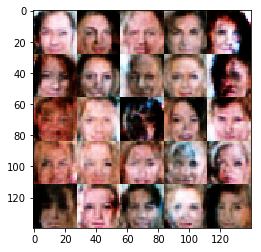

Epoch 1/1... Discriminator Loss: 0.7012... Generator Loss: 1.6310
Epoch 1/1... Discriminator Loss: 0.7001... Generator Loss: 2.4154
Epoch 1/1... Discriminator Loss: 0.5962... Generator Loss: 1.5819
Epoch 1/1... Discriminator Loss: 0.6597... Generator Loss: 1.7010
Epoch 1/1... Discriminator Loss: 0.8237... Generator Loss: 1.6040
Epoch 1/1... Discriminator Loss: 1.9178... Generator Loss: 0.3459
Epoch 1/1... Discriminator Loss: 1.0028... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 0.6321... Generator Loss: 1.9627
Epoch 1/1... Discriminator Loss: 1.1823... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 0.9330... Generator Loss: 0.8184


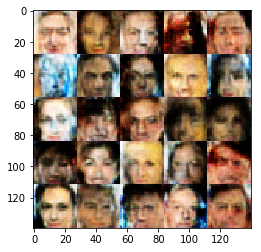

Epoch 1/1... Discriminator Loss: 0.9739... Generator Loss: 1.2918
Epoch 1/1... Discriminator Loss: 0.8982... Generator Loss: 1.3326
Epoch 1/1... Discriminator Loss: 1.4124... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 1.1030
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 3.6237
Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 1.1812... Generator Loss: 0.8384
Epoch 1/1... Discriminator Loss: 0.8248... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 0.8510
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 1.6875


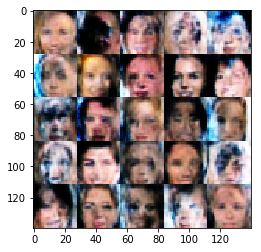

Epoch 1/1... Discriminator Loss: 1.7547... Generator Loss: 0.3396
Epoch 1/1... Discriminator Loss: 0.7162... Generator Loss: 2.1664
Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 1.3735
Epoch 1/1... Discriminator Loss: 1.4101... Generator Loss: 0.4286
Epoch 1/1... Discriminator Loss: 0.7270... Generator Loss: 2.1268
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 0.7232... Generator Loss: 1.7768
Epoch 1/1... Discriminator Loss: 0.6502... Generator Loss: 2.0019
Epoch 1/1... Discriminator Loss: 0.8512... Generator Loss: 0.9832
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 1.7734


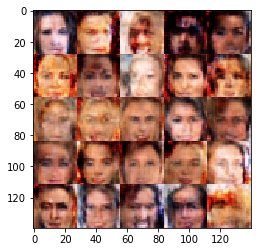

Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 1.9689
Epoch 1/1... Discriminator Loss: 0.9167... Generator Loss: 2.0692
Epoch 1/1... Discriminator Loss: 0.6557... Generator Loss: 2.5070
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 1.7832
Epoch 1/1... Discriminator Loss: 1.2063... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.0198... Generator Loss: 0.9859
Epoch 1/1... Discriminator Loss: 0.9520... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.8193
Epoch 1/1... Discriminator Loss: 1.5000... Generator Loss: 2.3281
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 0.9781


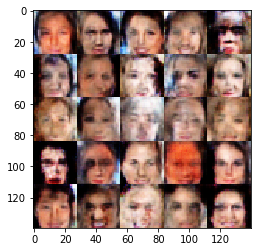

Epoch 1/1... Discriminator Loss: 1.7571... Generator Loss: 0.3639
Epoch 1/1... Discriminator Loss: 1.0083... Generator Loss: 2.7049
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 1.2241
Epoch 1/1... Discriminator Loss: 1.0636... Generator Loss: 1.4935
Epoch 1/1... Discriminator Loss: 0.8609... Generator Loss: 1.2008
Epoch 1/1... Discriminator Loss: 0.8339... Generator Loss: 2.1910
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.8047
Epoch 1/1... Discriminator Loss: 0.8142... Generator Loss: 1.2873
Epoch 1/1... Discriminator Loss: 2.0837... Generator Loss: 3.5004
Epoch 1/1... Discriminator Loss: 1.0005... Generator Loss: 1.1448


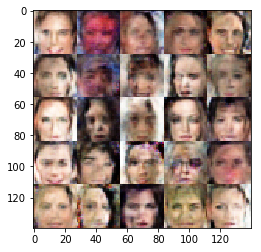

Epoch 1/1... Discriminator Loss: 0.7203... Generator Loss: 2.3073
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 1.4643... Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 1.0835... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.9412
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.5888
Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 0.8420
Epoch 1/1... Discriminator Loss: 0.9953... Generator Loss: 1.4537
Epoch 1/1... Discriminator Loss: 0.6708... Generator Loss: 1.7815
Epoch 1/1... Discriminator Loss: 0.8512... Generator Loss: 1.8651


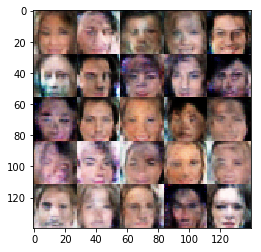

Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.7733
Epoch 1/1... Discriminator Loss: 1.0702... Generator Loss: 1.5958
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.3554
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 1.2615
Epoch 1/1... Discriminator Loss: 1.0128... Generator Loss: 1.8331
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 1.0204
Epoch 1/1... Discriminator Loss: 1.2024... Generator Loss: 0.6686
Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 1.5213
Epoch 1/1... Discriminator Loss: 0.6392... Generator Loss: 2.2855


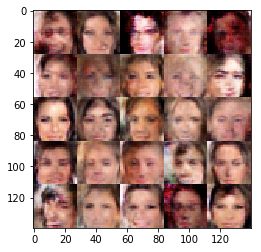

Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.0004
Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 2.9158
Epoch 1/1... Discriminator Loss: 0.9198... Generator Loss: 1.6279
Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 0.9389... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 0.9996... Generator Loss: 0.9087
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 1.1974
Epoch 1/1... Discriminator Loss: 1.5063... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 0.8552... Generator Loss: 1.5869
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 0.7448


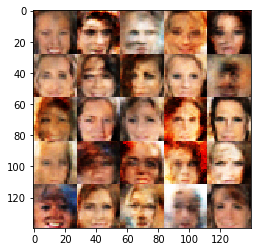

Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 1.6486
Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 1.1906
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.7086
Epoch 1/1... Discriminator Loss: 0.7990... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 0.9448... Generator Loss: 1.5910
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.3014
Epoch 1/1... Discriminator Loss: 0.9320... Generator Loss: 1.8018
Epoch 1/1... Discriminator Loss: 1.2860... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 1.1797


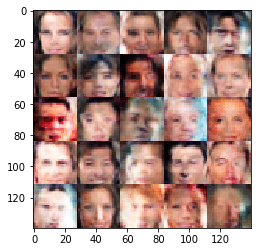

Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 1.5247
Epoch 1/1... Discriminator Loss: 1.0465... Generator Loss: 0.9858
Epoch 1/1... Discriminator Loss: 0.7626... Generator Loss: 1.5178
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 2.3790
Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 1.6980
Epoch 1/1... Discriminator Loss: 0.9959... Generator Loss: 1.1726
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 0.8613
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 0.9901
Epoch 1/1... Discriminator Loss: 0.7898... Generator Loss: 1.3954
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.8182


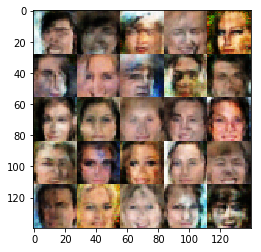

Epoch 1/1... Discriminator Loss: 0.9799... Generator Loss: 1.6846
Epoch 1/1... Discriminator Loss: 0.8491... Generator Loss: 1.7179
Epoch 1/1... Discriminator Loss: 0.8776... Generator Loss: 1.3345
Epoch 1/1... Discriminator Loss: 0.9863... Generator Loss: 1.0155
Epoch 1/1... Discriminator Loss: 0.9457... Generator Loss: 0.9823
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 1.5311
Epoch 1/1... Discriminator Loss: 0.9460... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 0.9907... Generator Loss: 1.6518
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.8392


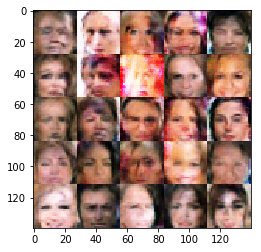

Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 0.9128
Epoch 1/1... Discriminator Loss: 1.0063... Generator Loss: 2.1525
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.7207
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 0.9999... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 1.3251... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.9542
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 1.4018
Epoch 1/1... Discriminator Loss: 0.9689... Generator Loss: 0.8524


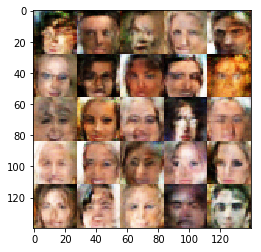

Epoch 1/1... Discriminator Loss: 0.7991... Generator Loss: 1.3290
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 0.8085
Epoch 1/1... Discriminator Loss: 0.9905... Generator Loss: 0.8570
Epoch 1/1... Discriminator Loss: 0.8680... Generator Loss: 1.2047
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 1.1843
Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 1.0680
Epoch 1/1... Discriminator Loss: 0.7771... Generator Loss: 1.3686
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 1.6842
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 1.6529
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.8928


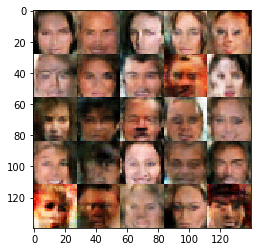

Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.5770
Epoch 1/1... Discriminator Loss: 1.0660... Generator Loss: 1.9143
Epoch 1/1... Discriminator Loss: 1.0750... Generator Loss: 1.4924
Epoch 1/1... Discriminator Loss: 0.8900... Generator Loss: 1.1575
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.7703
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 0.9236
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.6245
Epoch 1/1... Discriminator Loss: 0.8461... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 1.1504... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.6337


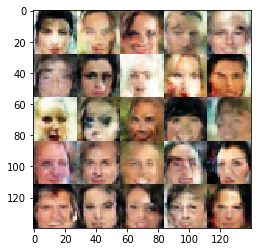

Epoch 1/1... Discriminator Loss: 0.9944... Generator Loss: 0.9670
Epoch 1/1... Discriminator Loss: 1.5533... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 0.8749... Generator Loss: 1.7468
Epoch 1/1... Discriminator Loss: 1.0178... Generator Loss: 1.2610
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.5845
Epoch 1/1... Discriminator Loss: 0.8690... Generator Loss: 1.6318
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 1.6501
Epoch 1/1... Discriminator Loss: 1.0026... Generator Loss: 1.2463
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.4161
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 1.1184


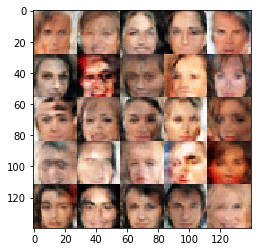

Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 1.4016
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.5074
Epoch 1/1... Discriminator Loss: 0.8987... Generator Loss: 1.5272
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 1.5112
Epoch 1/1... Discriminator Loss: 0.8916... Generator Loss: 1.7833
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.5652
Epoch 1/1... Discriminator Loss: 0.7440... Generator Loss: 1.0956
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 1.7886
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 2.1441
Epoch 1/1... Discriminator Loss: 1.0068... Generator Loss: 1.1160


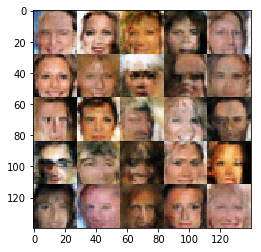

Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 1.3633
Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.8610
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.7549
Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.0178... Generator Loss: 1.7941
Epoch 1/1... Discriminator Loss: 0.9465... Generator Loss: 1.3919
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 1.1436... Generator Loss: 1.4580
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 0.9020


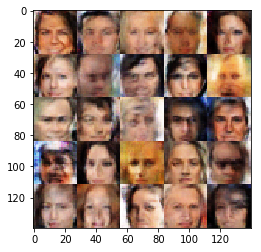

Epoch 1/1... Discriminator Loss: 0.7847... Generator Loss: 1.7469
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 0.9633
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 1.6017
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 0.8807... Generator Loss: 0.8870
Epoch 1/1... Discriminator Loss: 1.0566... Generator Loss: 1.4175
Epoch 1/1... Discriminator Loss: 0.8127... Generator Loss: 1.3175
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.3704


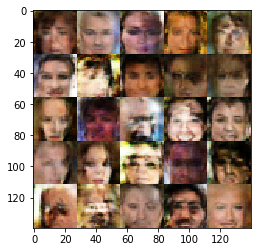

Epoch 1/1... Discriminator Loss: 0.8724... Generator Loss: 1.8773
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 0.7275
Epoch 1/1... Discriminator Loss: 0.8817... Generator Loss: 1.3995
Epoch 1/1... Discriminator Loss: 1.1634... Generator Loss: 2.4461
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 2.1011
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.8098
Epoch 1/1... Discriminator Loss: 0.8223... Generator Loss: 1.2838
Epoch 1/1... Discriminator Loss: 0.9274... Generator Loss: 1.4898
Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 1.0437
Epoch 1/1... Discriminator Loss: 1.0185... Generator Loss: 1.0363


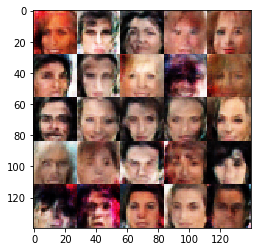

Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 1.1210
Epoch 1/1... Discriminator Loss: 1.0676... Generator Loss: 1.4697
Epoch 1/1... Discriminator Loss: 0.9692... Generator Loss: 1.1616
Epoch 1/1... Discriminator Loss: 0.9358... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 1.5674
Epoch 1/1... Discriminator Loss: 0.7055... Generator Loss: 2.1307
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 0.9819
Epoch 1/1... Discriminator Loss: 0.9150... Generator Loss: 1.1650


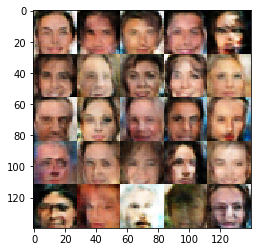

Epoch 1/1... Discriminator Loss: 0.7719... Generator Loss: 1.8655
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 1.0895
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 1.6179
Epoch 1/1... Discriminator Loss: 1.2571... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.9942
Epoch 1/1... Discriminator Loss: 0.8905... Generator Loss: 1.6720
Epoch 1/1... Discriminator Loss: 0.9502... Generator Loss: 0.9938
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 1.5023
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.0595... Generator Loss: 0.6976


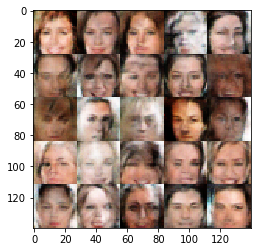

Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 1.7190
Epoch 1/1... Discriminator Loss: 1.0820... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 0.7904... Generator Loss: 1.7799
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.1952... Generator Loss: 0.9650
Epoch 1/1... Discriminator Loss: 0.8962... Generator Loss: 1.4110
Epoch 1/1... Discriminator Loss: 1.5058... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 2.0264
Epoch 1/1... Discriminator Loss: 0.7822... Generator Loss: 1.7505
Epoch 1/1... Discriminator Loss: 0.9004... Generator Loss: 1.1205


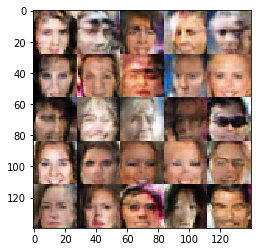

Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 1.5981
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 1.5018
Epoch 1/1... Discriminator Loss: 0.8076... Generator Loss: 1.5452
Epoch 1/1... Discriminator Loss: 0.9659... Generator Loss: 1.3739
Epoch 1/1... Discriminator Loss: 0.8790... Generator Loss: 1.3517
Epoch 1/1... Discriminator Loss: 1.2065... Generator Loss: 0.9889
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.6431
Epoch 1/1... Discriminator Loss: 0.9456... Generator Loss: 1.2890
Epoch 1/1... Discriminator Loss: 0.7442... Generator Loss: 1.9976


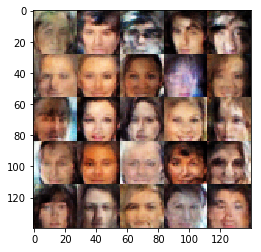

Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 0.9282... Generator Loss: 1.8082
Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 0.8835... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 0.6747... Generator Loss: 1.5045
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 0.7991... Generator Loss: 1.2903
Epoch 1/1... Discriminator Loss: 1.0890... Generator Loss: 0.9085
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.9834


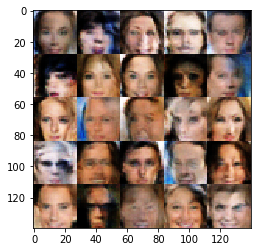

Epoch 1/1... Discriminator Loss: 0.7613... Generator Loss: 1.5109
Epoch 1/1... Discriminator Loss: 0.7300... Generator Loss: 1.4444
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 0.9936
Epoch 1/1... Discriminator Loss: 0.8641... Generator Loss: 1.8275
Epoch 1/1... Discriminator Loss: 0.8917... Generator Loss: 0.8776
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 0.9433... Generator Loss: 1.5472


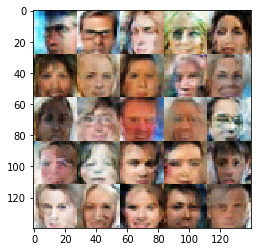

Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 0.6484
Epoch 1/1... Discriminator Loss: 0.8692... Generator Loss: 1.3946
Epoch 1/1... Discriminator Loss: 0.8597... Generator Loss: 1.1224
Epoch 1/1... Discriminator Loss: 0.8662... Generator Loss: 1.1232
Epoch 1/1... Discriminator Loss: 0.9360... Generator Loss: 1.0674
Epoch 1/1... Discriminator Loss: 1.4888... Generator Loss: 0.4567
Epoch 1/1... Discriminator Loss: 1.0089... Generator Loss: 1.1998
Epoch 1/1... Discriminator Loss: 0.8560... Generator Loss: 1.6441
Epoch 1/1... Discriminator Loss: 1.2285... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 0.8873... Generator Loss: 0.9708


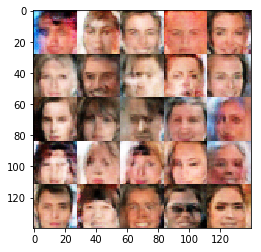

Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.1043... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 0.9715... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 0.8225... Generator Loss: 1.6492
Epoch 1/1... Discriminator Loss: 0.7542... Generator Loss: 2.0469
Epoch 1/1... Discriminator Loss: 0.9826... Generator Loss: 1.4507
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.8402
Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 0.8117... Generator Loss: 1.4413


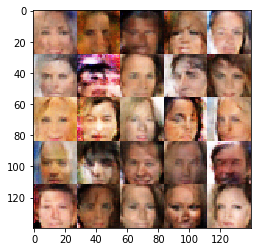

Epoch 1/1... Discriminator Loss: 0.7206... Generator Loss: 1.6709
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.7753
Epoch 1/1... Discriminator Loss: 1.0828... Generator Loss: 0.9046
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 0.7745... Generator Loss: 1.1675
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 1.0500
Epoch 1/1... Discriminator Loss: 0.7483... Generator Loss: 1.6646
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 1.0263
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 0.8742... Generator Loss: 1.7587


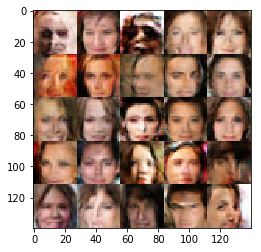

Epoch 1/1... Discriminator Loss: 0.6905... Generator Loss: 1.9229
Epoch 1/1... Discriminator Loss: 0.9770... Generator Loss: 2.2410
Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 1.3445
Epoch 1/1... Discriminator Loss: 0.9097... Generator Loss: 0.9922
Epoch 1/1... Discriminator Loss: 0.7908... Generator Loss: 1.7478
Epoch 1/1... Discriminator Loss: 0.8308... Generator Loss: 2.0865
Epoch 1/1... Discriminator Loss: 0.9734... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.0764... Generator Loss: 0.9685
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 0.8924


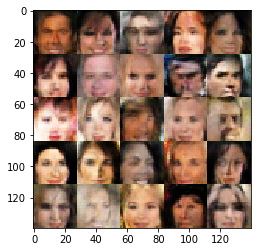

Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.1756... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 1.1957
Epoch 1/1... Discriminator Loss: 0.7551... Generator Loss: 1.4840
Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.8916
Epoch 1/1... Discriminator Loss: 0.6838... Generator Loss: 1.8399
Epoch 1/1... Discriminator Loss: 0.6649... Generator Loss: 1.7031
Epoch 1/1... Discriminator Loss: 1.4350... Generator Loss: 1.4832
Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.0885
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.2131


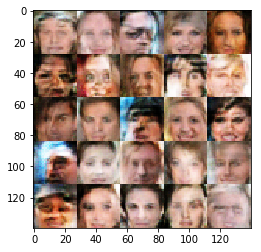

Epoch 1/1... Discriminator Loss: 0.9855... Generator Loss: 0.8954
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 1.5129
Epoch 1/1... Discriminator Loss: 1.1112... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 1.0271... Generator Loss: 1.6972
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 1.1941
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 2.1694
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 0.8761
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 0.9590


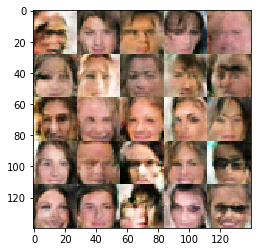

Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 2.0710
Epoch 1/1... Discriminator Loss: 1.0754... Generator Loss: 1.5278
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 0.8849... Generator Loss: 0.8244
Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 1.0720
Epoch 1/1... Discriminator Loss: 0.8566... Generator Loss: 1.5518
Epoch 1/1... Discriminator Loss: 0.8911... Generator Loss: 1.2050
Epoch 1/1... Discriminator Loss: 0.7914... Generator Loss: 1.1742
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 1.2300


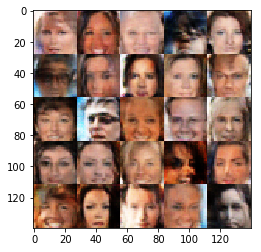

Epoch 1/1... Discriminator Loss: 1.0558... Generator Loss: 1.4963
Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 1.4522
Epoch 1/1... Discriminator Loss: 0.7997... Generator Loss: 1.4638
Epoch 1/1... Discriminator Loss: 0.9090... Generator Loss: 1.2682
Epoch 1/1... Discriminator Loss: 1.0089... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 0.9194... Generator Loss: 1.6673
Epoch 1/1... Discriminator Loss: 0.7899... Generator Loss: 1.6410
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 2.5519
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 1.5954
Epoch 1/1... Discriminator Loss: 0.9921... Generator Loss: 0.7525


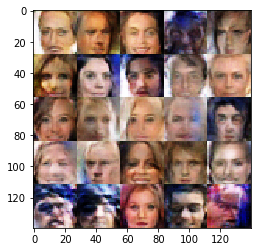

Epoch 1/1... Discriminator Loss: 0.9586... Generator Loss: 1.0410
Epoch 1/1... Discriminator Loss: 0.8652... Generator Loss: 1.2253
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 1.5359
Epoch 1/1... Discriminator Loss: 0.7586... Generator Loss: 1.7187
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 0.9994
Epoch 1/1... Discriminator Loss: 0.7514... Generator Loss: 1.5516
Epoch 1/1... Discriminator Loss: 0.7168... Generator Loss: 1.4723
Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 0.7244
Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 1.4633


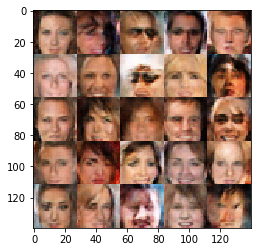

Epoch 1/1... Discriminator Loss: 0.9352... Generator Loss: 1.3439
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.5089
Epoch 1/1... Discriminator Loss: 0.8405... Generator Loss: 1.2423
Epoch 1/1... Discriminator Loss: 0.9609... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 1.5265
Epoch 1/1... Discriminator Loss: 1.1013... Generator Loss: 0.6386
Epoch 1/1... Discriminator Loss: 0.7454... Generator Loss: 1.3163
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.6046
Epoch 1/1... Discriminator Loss: 0.7933... Generator Loss: 1.7401
Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 2.4684


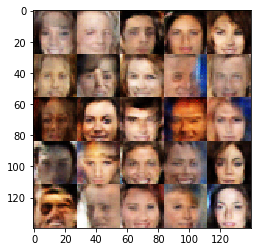

Epoch 1/1... Discriminator Loss: 0.8063... Generator Loss: 2.4342
Epoch 1/1... Discriminator Loss: 0.5579... Generator Loss: 3.3093
Epoch 1/1... Discriminator Loss: 0.8442... Generator Loss: 1.3200
Epoch 1/1... Discriminator Loss: 0.7275... Generator Loss: 1.9473
Epoch 1/1... Discriminator Loss: 0.8847... Generator Loss: 1.7824
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 0.8673... Generator Loss: 1.9358
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 0.9476
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 1.6507
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.6654


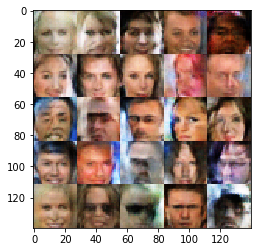

Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 1.6238
Epoch 1/1... Discriminator Loss: 0.6866... Generator Loss: 2.1343
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 1.3042
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.8642
Epoch 1/1... Discriminator Loss: 0.7361... Generator Loss: 1.8868
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 2.2988
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 0.9695
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.5582
Epoch 1/1... Discriminator Loss: 0.9619... Generator Loss: 1.6039
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 1.9591


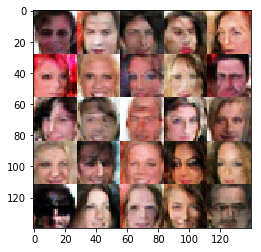

Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 0.9025
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 1.4168
Epoch 1/1... Discriminator Loss: 0.9290... Generator Loss: 1.5336
Epoch 1/1... Discriminator Loss: 0.9778... Generator Loss: 1.1881
Epoch 1/1... Discriminator Loss: 0.8449... Generator Loss: 1.6579
Epoch 1/1... Discriminator Loss: 0.7633... Generator Loss: 1.6535
Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 1.0786... Generator Loss: 2.2952
Epoch 1/1... Discriminator Loss: 0.7829... Generator Loss: 1.6736
Epoch 1/1... Discriminator Loss: 0.9127... Generator Loss: 1.0826


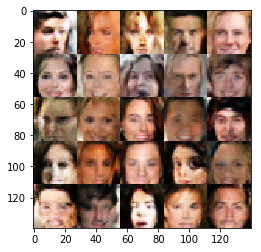

Epoch 1/1... Discriminator Loss: 0.9312... Generator Loss: 2.0231
Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 1.4568
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 0.8878
Epoch 1/1... Discriminator Loss: 0.7900... Generator Loss: 1.2762
Epoch 1/1... Discriminator Loss: 0.8286... Generator Loss: 1.2410
Epoch 1/1... Discriminator Loss: 0.7376... Generator Loss: 2.1742
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.6465
Epoch 1/1... Discriminator Loss: 0.8371... Generator Loss: 1.4373
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.4311... Generator Loss: 1.0085


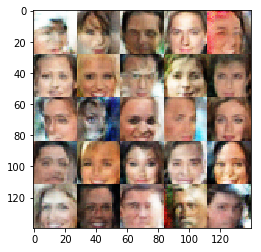

Epoch 1/1... Discriminator Loss: 0.8890... Generator Loss: 1.5842
Epoch 1/1... Discriminator Loss: 1.0135... Generator Loss: 2.2770
Epoch 1/1... Discriminator Loss: 1.0251... Generator Loss: 1.0693
Epoch 1/1... Discriminator Loss: 0.8485... Generator Loss: 1.7717
Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 1.7568
Epoch 1/1... Discriminator Loss: 1.0495... Generator Loss: 0.8658
Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 2.2340
Epoch 1/1... Discriminator Loss: 0.8039... Generator Loss: 1.0967
Epoch 1/1... Discriminator Loss: 0.9732... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.7633... Generator Loss: 1.3121


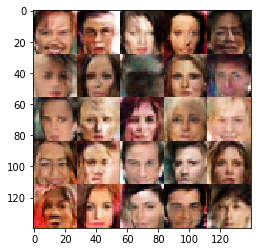

Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 2.1108
Epoch 1/1... Discriminator Loss: 2.4642... Generator Loss: 0.2358
Epoch 1/1... Discriminator Loss: 0.7241... Generator Loss: 1.4817
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 1.0137
Epoch 1/1... Discriminator Loss: 0.9429... Generator Loss: 1.4762
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.6026
Epoch 1/1... Discriminator Loss: 1.1633... Generator Loss: 1.6914
Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 0.9138
Epoch 1/1... Discriminator Loss: 0.8025... Generator Loss: 1.8882


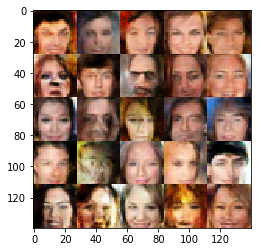

Epoch 1/1... Discriminator Loss: 0.9481... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 1.9303
Epoch 1/1... Discriminator Loss: 0.5916... Generator Loss: 1.6997
Epoch 1/1... Discriminator Loss: 0.7588... Generator Loss: 1.9449
Epoch 1/1... Discriminator Loss: 1.1061... Generator Loss: 0.9890
Epoch 1/1... Discriminator Loss: 0.7588... Generator Loss: 1.0927
Epoch 1/1... Discriminator Loss: 0.8783... Generator Loss: 1.3617
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 0.8244... Generator Loss: 1.5546
Epoch 1/1... Discriminator Loss: 1.1836... Generator Loss: 0.7280


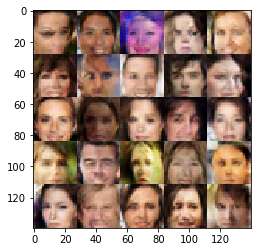

Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.7595
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 0.8364
Epoch 1/1... Discriminator Loss: 0.7178... Generator Loss: 2.1517
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 2.8125
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 2.2736
Epoch 1/1... Discriminator Loss: 0.9518... Generator Loss: 1.4644
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.5370
Epoch 1/1... Discriminator Loss: 0.8020... Generator Loss: 1.2015
Epoch 1/1... Discriminator Loss: 0.8964... Generator Loss: 1.0348
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 0.9443


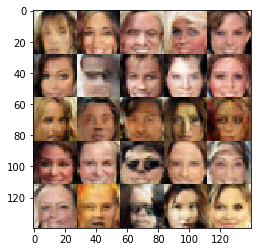

Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 1.2820
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.0697
Epoch 1/1... Discriminator Loss: 0.9083... Generator Loss: 1.2278
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 1.8007
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.6401
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 1.1199
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 1.0570
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.4699
Epoch 1/1... Discriminator Loss: 0.8979... Generator Loss: 1.2320


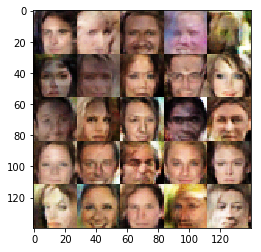

Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 1.4466
Epoch 1/1... Discriminator Loss: 0.9106... Generator Loss: 0.7953
Epoch 1/1... Discriminator Loss: 0.6748... Generator Loss: 1.7503
Epoch 1/1... Discriminator Loss: 0.7804... Generator Loss: 2.4882
Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 1.6594
Epoch 1/1... Discriminator Loss: 0.7708... Generator Loss: 1.3317
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 1.1456
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.9597
Epoch 1/1... Discriminator Loss: 0.9873... Generator Loss: 2.1503
Epoch 1/1... Discriminator Loss: 0.8803... Generator Loss: 1.1046


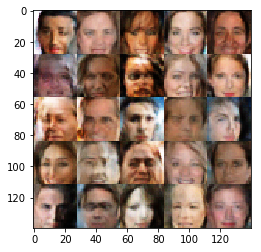

Epoch 1/1... Discriminator Loss: 0.9326... Generator Loss: 1.1474
Epoch 1/1... Discriminator Loss: 0.8102... Generator Loss: 1.4671
Epoch 1/1... Discriminator Loss: 1.0166... Generator Loss: 1.7215
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.1434
Epoch 1/1... Discriminator Loss: 0.8343... Generator Loss: 2.3052
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 1.1117
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.6572
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 0.7204... Generator Loss: 2.1933
Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 1.2995


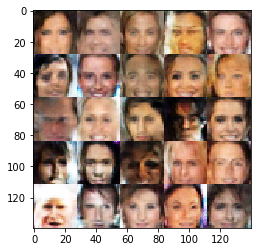

Epoch 1/1... Discriminator Loss: 0.7055... Generator Loss: 1.9408
Epoch 1/1... Discriminator Loss: 0.7786... Generator Loss: 1.2704
Epoch 1/1... Discriminator Loss: 0.9743... Generator Loss: 2.0740
Epoch 1/1... Discriminator Loss: 0.8996... Generator Loss: 1.4581
Epoch 1/1... Discriminator Loss: 0.7494... Generator Loss: 2.6313
Epoch 1/1... Discriminator Loss: 0.8316... Generator Loss: 0.9402
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 0.8640... Generator Loss: 1.1164
Epoch 1/1... Discriminator Loss: 0.8557... Generator Loss: 1.5198
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 1.0202


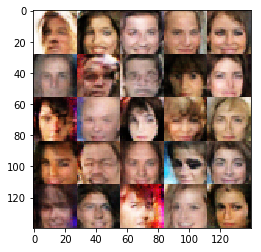

Epoch 1/1... Discriminator Loss: 0.8402... Generator Loss: 1.4348
Epoch 1/1... Discriminator Loss: 1.0131... Generator Loss: 1.2254
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.1991
Epoch 1/1... Discriminator Loss: 0.7379... Generator Loss: 1.7913
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 1.0048
Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 0.9506
Epoch 1/1... Discriminator Loss: 0.7636... Generator Loss: 1.7528
Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 0.9109
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 1.2628
Epoch 1/1... Discriminator Loss: 1.0152... Generator Loss: 1.0164


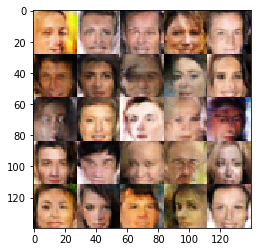

Epoch 1/1... Discriminator Loss: 0.9174... Generator Loss: 1.2963
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.0516
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 1.2923
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 1.0024
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.6755
Epoch 1/1... Discriminator Loss: 1.0535... Generator Loss: 1.0096
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.0891
Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 2.4322
Epoch 1/1... Discriminator Loss: 0.8587... Generator Loss: 1.3500


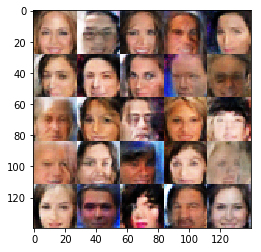

Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 1.5798
Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 1.7441
Epoch 1/1... Discriminator Loss: 0.9140... Generator Loss: 1.2235
Epoch 1/1... Discriminator Loss: 0.8762... Generator Loss: 1.1110
Epoch 1/1... Discriminator Loss: 0.7870... Generator Loss: 1.2509
Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 1.3413
Epoch 1/1... Discriminator Loss: 0.8984... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.2557... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 1.3104
Epoch 1/1... Discriminator Loss: 0.7604... Generator Loss: 1.3592


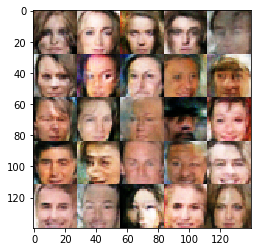

Epoch 1/1... Discriminator Loss: 0.8907... Generator Loss: 1.0353
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 0.9460
Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 0.7941
Epoch 1/1... Discriminator Loss: 0.7077... Generator Loss: 1.5818
Epoch 1/1... Discriminator Loss: 0.8996... Generator Loss: 1.1510
Epoch 1/1... Discriminator Loss: 0.7351... Generator Loss: 1.3195
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.3744
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.6574
Epoch 1/1... Discriminator Loss: 0.7058... Generator Loss: 1.6165
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 3.0409


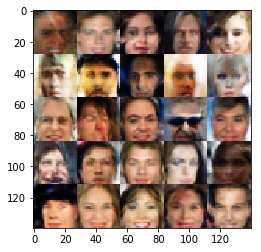

Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 1.4963
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 1.8658
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 1.3036
Epoch 1/1... Discriminator Loss: 0.8236... Generator Loss: 1.6696
Epoch 1/1... Discriminator Loss: 1.0579... Generator Loss: 1.0005
Epoch 1/1... Discriminator Loss: 0.7820... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 0.7116... Generator Loss: 1.4637
Epoch 1/1... Discriminator Loss: 0.9000... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 0.8479... Generator Loss: 1.4070
Epoch 1/1... Discriminator Loss: 0.7750... Generator Loss: 2.4027


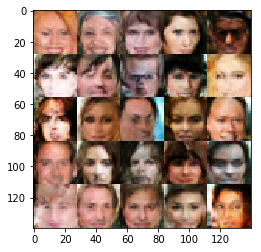

Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 1.1787
Epoch 1/1... Discriminator Loss: 0.7757... Generator Loss: 1.6399
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 1.8518
Epoch 1/1... Discriminator Loss: 0.6040... Generator Loss: 2.2499
Epoch 1/1... Discriminator Loss: 0.9660... Generator Loss: 1.5634
Epoch 1/1... Discriminator Loss: 0.9672... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 0.7429... Generator Loss: 1.7734
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 2.2036
Epoch 1/1... Discriminator Loss: 0.9070... Generator Loss: 1.1854
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.7660


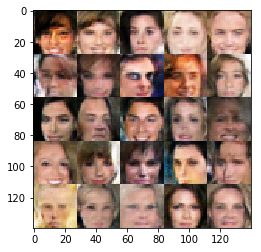

Epoch 1/1... Discriminator Loss: 0.8695... Generator Loss: 1.4526
Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 1.1352
Epoch 1/1... Discriminator Loss: 1.0751... Generator Loss: 1.0831
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 0.7775... Generator Loss: 1.6329
Epoch 1/1... Discriminator Loss: 0.7410... Generator Loss: 1.5668
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.8997
Epoch 1/1... Discriminator Loss: 0.6090... Generator Loss: 1.8792
Epoch 1/1... Discriminator Loss: 1.0366... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 0.8704... Generator Loss: 1.0061


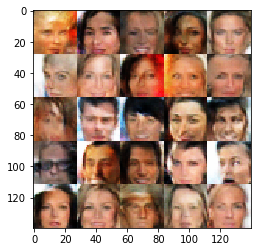

Epoch 1/1... Discriminator Loss: 1.0965... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 0.8583... Generator Loss: 1.6519
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 1.6968
Epoch 1/1... Discriminator Loss: 0.9019... Generator Loss: 2.2748
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 2.9801
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.8810
Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 2.3025
Epoch 1/1... Discriminator Loss: 0.8385... Generator Loss: 1.1734
Epoch 1/1... Discriminator Loss: 0.7727... Generator Loss: 1.1891
Epoch 1/1... Discriminator Loss: 0.8532... Generator Loss: 1.1564


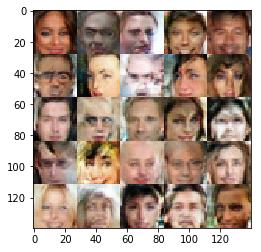

Epoch 1/1... Discriminator Loss: 0.8022... Generator Loss: 1.1846
Epoch 1/1... Discriminator Loss: 0.7724... Generator Loss: 1.9507
Epoch 1/1... Discriminator Loss: 1.1844... Generator Loss: 1.5063
Epoch 1/1... Discriminator Loss: 0.6474... Generator Loss: 1.4663
Epoch 1/1... Discriminator Loss: 1.1055... Generator Loss: 0.9694
Epoch 1/1... Discriminator Loss: 0.7073... Generator Loss: 2.1348
Epoch 1/1... Discriminator Loss: 1.1309... Generator Loss: 0.7339
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 1.2896
Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 2.0231
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 1.0871


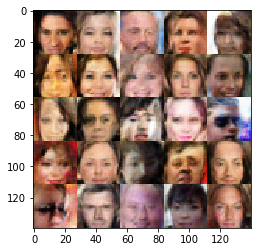

Epoch 1/1... Discriminator Loss: 0.9805... Generator Loss: 1.8441
Epoch 1/1... Discriminator Loss: 0.7151... Generator Loss: 1.1610
Epoch 1/1... Discriminator Loss: 0.7539... Generator Loss: 1.6066
Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 1.3540
Epoch 1/1... Discriminator Loss: 0.8988... Generator Loss: 1.6305
Epoch 1/1... Discriminator Loss: 0.5391... Generator Loss: 2.1071
Epoch 1/1... Discriminator Loss: 0.8531... Generator Loss: 1.3459
Epoch 1/1... Discriminator Loss: 0.8288... Generator Loss: 1.6989
Epoch 1/1... Discriminator Loss: 0.8776... Generator Loss: 1.4857
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 1.1089


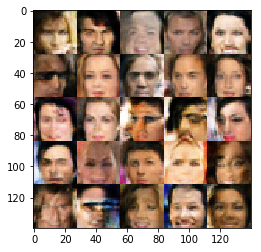

Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 0.7675
Epoch 1/1... Discriminator Loss: 0.8422... Generator Loss: 1.3467
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.9715
Epoch 1/1... Discriminator Loss: 0.6579... Generator Loss: 1.6738
Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 1.2776
Epoch 1/1... Discriminator Loss: 0.8540... Generator Loss: 1.5084
Epoch 1/1... Discriminator Loss: 0.8212... Generator Loss: 1.2791
Epoch 1/1... Discriminator Loss: 0.9498... Generator Loss: 1.8946
Epoch 1/1... Discriminator Loss: 0.7514... Generator Loss: 1.8268


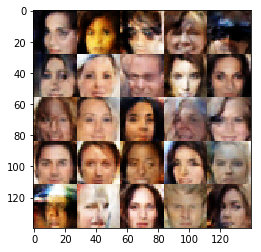

Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 1.1957
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.3066
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.2608
Epoch 1/1... Discriminator Loss: 0.6617... Generator Loss: 2.0444
Epoch 1/1... Discriminator Loss: 0.7421... Generator Loss: 1.9960
Epoch 1/1... Discriminator Loss: 0.7581... Generator Loss: 1.4230
Epoch 1/1... Discriminator Loss: 0.6753... Generator Loss: 1.5313
Epoch 1/1... Discriminator Loss: 0.7022... Generator Loss: 1.5847
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 2.2990
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.4884


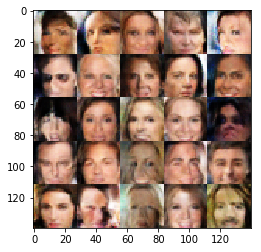

Epoch 1/1... Discriminator Loss: 0.8044... Generator Loss: 1.1959
Epoch 1/1... Discriminator Loss: 0.6858... Generator Loss: 1.8362
Epoch 1/1... Discriminator Loss: 0.8222... Generator Loss: 1.5553
Epoch 1/1... Discriminator Loss: 0.8699... Generator Loss: 1.6031
Epoch 1/1... Discriminator Loss: 0.8949... Generator Loss: 1.3860
Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 2.4170
Epoch 1/1... Discriminator Loss: 0.8655... Generator Loss: 1.4018
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 0.9215
Epoch 1/1... Discriminator Loss: 0.7073... Generator Loss: 1.4427
Epoch 1/1... Discriminator Loss: 0.7404... Generator Loss: 1.8786


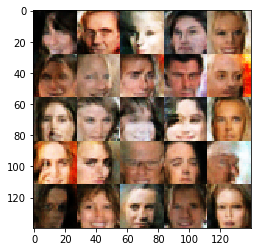

Epoch 1/1... Discriminator Loss: 0.7753... Generator Loss: 1.5105
Epoch 1/1... Discriminator Loss: 0.7652... Generator Loss: 1.5034
Epoch 1/1... Discriminator Loss: 0.8895... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.2447
Epoch 1/1... Discriminator Loss: 1.1723... Generator Loss: 0.9688
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.8785
Epoch 1/1... Discriminator Loss: 1.0276... Generator Loss: 1.0023
Epoch 1/1... Discriminator Loss: 0.6798... Generator Loss: 1.7385
Epoch 1/1... Discriminator Loss: 0.6865... Generator Loss: 2.0581
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 2.0680


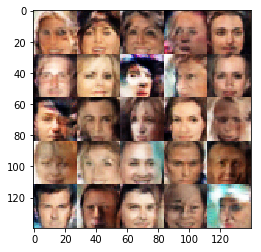

Epoch 1/1... Discriminator Loss: 1.1511... Generator Loss: 0.8924
Epoch 1/1... Discriminator Loss: 0.7599... Generator Loss: 1.5043
Epoch 1/1... Discriminator Loss: 0.8903... Generator Loss: 1.1642
Epoch 1/1... Discriminator Loss: 0.8524... Generator Loss: 1.5701
Epoch 1/1... Discriminator Loss: 0.8712... Generator Loss: 1.0316
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 2.0436
Epoch 1/1... Discriminator Loss: 1.1502... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 0.8622... Generator Loss: 2.7373
Epoch 1/1... Discriminator Loss: 0.9121... Generator Loss: 2.4568
Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 1.5064


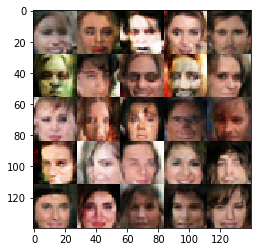

Epoch 1/1... Discriminator Loss: 0.7825... Generator Loss: 1.4977
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 2.1459
Epoch 1/1... Discriminator Loss: 0.8676... Generator Loss: 1.6454
Epoch 1/1... Discriminator Loss: 0.7421... Generator Loss: 2.0547
Epoch 1/1... Discriminator Loss: 0.7365... Generator Loss: 1.3671
Epoch 1/1... Discriminator Loss: 0.9216... Generator Loss: 2.1327
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 2.2249
Epoch 1/1... Discriminator Loss: 0.7419... Generator Loss: 1.6576
Epoch 1/1... Discriminator Loss: 0.6680... Generator Loss: 2.0407
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 1.3109


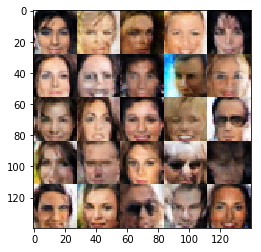

Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 1.1114
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.0141
Epoch 1/1... Discriminator Loss: 0.9441... Generator Loss: 1.0243
Epoch 1/1... Discriminator Loss: 0.8914... Generator Loss: 2.5149
Epoch 1/1... Discriminator Loss: 0.8452... Generator Loss: 1.3799
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 1.1846
Epoch 1/1... Discriminator Loss: 0.7965... Generator Loss: 1.8126
Epoch 1/1... Discriminator Loss: 0.8365... Generator Loss: 1.0337
Epoch 1/1... Discriminator Loss: 0.5533... Generator Loss: 2.3379
Epoch 1/1... Discriminator Loss: 0.8007... Generator Loss: 1.4360


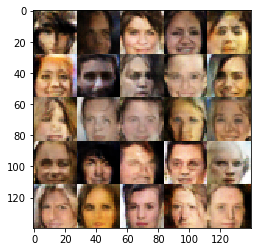

Epoch 1/1... Discriminator Loss: 0.7980... Generator Loss: 1.6701
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.9547
Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 1.7839
Epoch 1/1... Discriminator Loss: 0.8194... Generator Loss: 1.4276
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 0.9219
Epoch 1/1... Discriminator Loss: 0.6117... Generator Loss: 1.9615
Epoch 1/1... Discriminator Loss: 0.7099... Generator Loss: 1.3543
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 2.7409
Epoch 1/1... Discriminator Loss: 0.7547... Generator Loss: 1.6739
Epoch 1/1... Discriminator Loss: 0.6884... Generator Loss: 1.3756


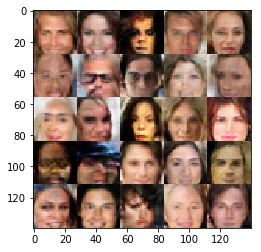

Epoch 1/1... Discriminator Loss: 0.6815... Generator Loss: 2.2714
Epoch 1/1... Discriminator Loss: 0.9219... Generator Loss: 0.9295
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 1.1200
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 1.4429
Epoch 1/1... Discriminator Loss: 0.8063... Generator Loss: 1.2289
Epoch 1/1... Discriminator Loss: 0.6700... Generator Loss: 1.6558
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 1.3594
Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.6224
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 1.4789


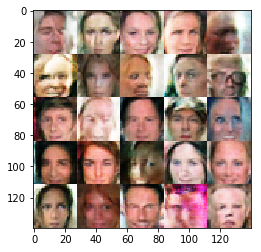

Epoch 1/1... Discriminator Loss: 0.6713... Generator Loss: 2.6630
Epoch 1/1... Discriminator Loss: 0.9748... Generator Loss: 1.2323
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 0.8633... Generator Loss: 1.4868
Epoch 1/1... Discriminator Loss: 1.0953... Generator Loss: 1.0509
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 1.0052
Epoch 1/1... Discriminator Loss: 0.7402... Generator Loss: 2.5645
Epoch 1/1... Discriminator Loss: 0.8083... Generator Loss: 1.6240
Epoch 1/1... Discriminator Loss: 0.6921... Generator Loss: 1.8973
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 1.1826


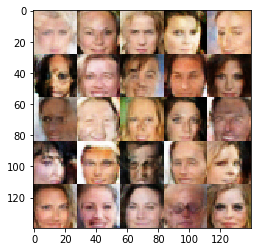

Epoch 1/1... Discriminator Loss: 0.7782... Generator Loss: 1.1511
Epoch 1/1... Discriminator Loss: 0.7775... Generator Loss: 1.0953
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 0.8399... Generator Loss: 1.7408
Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.9213
Epoch 1/1... Discriminator Loss: 0.8175... Generator Loss: 1.2975
Epoch 1/1... Discriminator Loss: 0.7699... Generator Loss: 1.8190
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 2.1116
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 2.0530


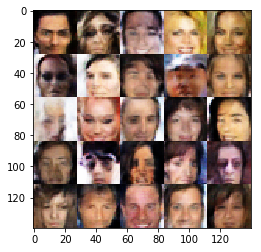

Epoch 1/1... Discriminator Loss: 0.7985... Generator Loss: 1.2389
Epoch 1/1... Discriminator Loss: 0.8702... Generator Loss: 1.7576
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 1.1351
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 0.8737... Generator Loss: 1.1886
Epoch 1/1... Discriminator Loss: 0.7972... Generator Loss: 1.4530
Epoch 1/1... Discriminator Loss: 0.8498... Generator Loss: 2.0599
Epoch 1/1... Discriminator Loss: 0.7196... Generator Loss: 1.1971
Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 1.6849
Epoch 1/1... Discriminator Loss: 0.9082... Generator Loss: 0.7782


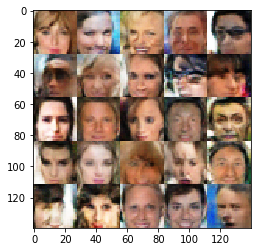

Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 1.2848
Epoch 1/1... Discriminator Loss: 0.6802... Generator Loss: 1.1208
Epoch 1/1... Discriminator Loss: 0.7385... Generator Loss: 1.8729
Epoch 1/1... Discriminator Loss: 0.7447... Generator Loss: 1.7671
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 1.2576
Epoch 1/1... Discriminator Loss: 0.6191... Generator Loss: 1.5379
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.8248
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 1.7698
Epoch 1/1... Discriminator Loss: 0.8966... Generator Loss: 1.5343
Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 0.8995


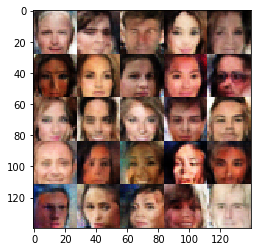

Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 1.5149
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.8589
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 0.9187... Generator Loss: 1.8877
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 1.7596
Epoch 1/1... Discriminator Loss: 0.8004... Generator Loss: 1.7154
Epoch 1/1... Discriminator Loss: 0.6918... Generator Loss: 1.7720
Epoch 1/1... Discriminator Loss: 0.7349... Generator Loss: 1.9191
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.4313
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.7643


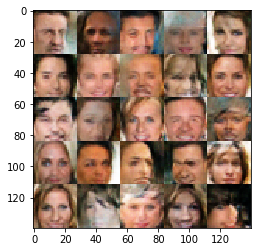

Epoch 1/1... Discriminator Loss: 0.7954... Generator Loss: 1.6827
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.6341
Epoch 1/1... Discriminator Loss: 0.7832... Generator Loss: 1.2560
Epoch 1/1... Discriminator Loss: 0.7077... Generator Loss: 2.0473
Epoch 1/1... Discriminator Loss: 0.7177... Generator Loss: 1.3707
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 1.5049
Epoch 1/1... Discriminator Loss: 0.7974... Generator Loss: 1.5955
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 0.9958... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 0.7476... Generator Loss: 1.2326


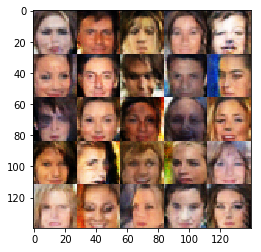

Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.1016
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 1.1505
Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 1.4107
Epoch 1/1... Discriminator Loss: 0.6286... Generator Loss: 1.9964


In [19]:
batch_size = 24
z_dim = 100
learning_rate = 0.0004
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.